In [657]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# The main question you need to answer is: which factors can help us predict if a customer will churn?

# 1. Import data

In [658]:
df = pd.read_csv('/Users/yuchenzhang/Desktop/MBAN 6110/Final Exam/churn_data.csv')

#  2. Dataframe checks

In [659]:
df.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1


In [660]:
# Drop Unnamed
df.drop('Unnamed: 0', axis=1, inplace = True)
df.set_index('CustomerID', inplace=True)

In [661]:
df.head(20)

,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,46,US,iOS,756.005761,39,2,582.023075,92,2,212.323540,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
2,52,US,iOS,594.838157,59,0,251.269898,33,2,186.909752,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
3,43,Canada,Android,453.217405,21,3,124.178946,92,0,316.492407,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
4,41,US,iOS,621.453170,95,1,134.362559,46,5,162.945529,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
5,41,US,iOS,660.735119,48,5,713.265527,54,2,736.904463,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1
6,44,Canada,iOS,379.341929,102,0,192.801991,78,5,210.853220,...,799.075989,75,0,391.590569,47,3,725.195820,90,4,1
7,59,Canada,Android,648.748331,112,1,869.202422,86,4,533.340947,...,192.919063,56,0,846.478478,67,5,295.464474,28,0,1
8,57,Canada,iOS,863.623818,64,4,243.217888,40,1,622.117973,...,847.159159,65,4,253.502568,59,1,592.257643,77,0,1
9,24,Canada,iOS,540.084190,73,5,779.503349,78,1,533.322208,...,199.054141,19,2,674.164817,18,1,367.026699,43,4,1


In [662]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     10000 non-null  int64  
 1   Location                10000 non-null  object 
 2   Device                  10000 non-null  object 
 3   Month_1_Spend           10000 non-null  float64
 4   Month_1_Items           10000 non-null  int64  
 5   Month_1_Support_Calls   10000 non-null  int64  
 6   Month_2_Spend           10000 non-null  float64
 7   Month_2_Items           10000 non-null  int64  
 8   Month_2_Support_Calls   10000 non-null  int64  
 9   Month_3_Spend           10000 non-null  float64
 10  Month_3_Items           10000 non-null  int64  
 11  Month_3_Support_Calls   10000 non-null  int64  
 12  Month_4_Spend           10000 non-null  float64
 13  Month_4_Items           10000 non-null  int64  
 14  Month_4_Support_Calls   10000 non-null  int

In [663]:
df.describe()

,Age,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,Month_3_Items,Month_3_Support_Calls,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,42.698500,482.593336,64.657700,2.488800,476.297118,63.118000,2.517400,481.965314,62.871600,2.515100,...,473.630524,58.227900,2.487000,472.671126,56.968900,2.519500,478.629330,56.512600,2.496300,0.70000
std,12.495528,237.961476,29.329527,1.711306,237.491820,28.933247,1.703639,235.535388,28.373477,1.704952,...,235.090366,25.909251,1.721083,234.288930,25.615119,1.702266,233.135282,25.263995,1.713674,0.45828
min,20.000000,45.147050,12.000000,0.000000,46.283232,12.000000,0.000000,45.792390,12.000000,0.000000,...,45.784922,12.000000,0.000000,45.139863,12.000000,0.000000,45.093583,12.000000,0.000000,0.00000
25%,32.000000,275.978779,39.000000,1.000000,268.427326,38.000000,1.000000,283.141582,38.000000,1.000000,...,268.470286,36.000000,1.000000,269.432095,35.000000,1.000000,276.507055,35.000000,1.000000,0.00000
50%,43.000000,482.173250,65.000000,2.000000,474.442784,63.000000,3.000000,480.440066,62.000000,3.000000,...,472.391691,58.000000,2.000000,472.530676,57.000000,3.000000,481.872558,56.000000,3.000000,1.00000
75%,53.000000,688.898992,90.000000,4.000000,680.824377,88.000000,4.000000,684.508894,87.000000,4.000000,...,680.923305,80.000000,4.000000,673.599392,78.000000,4.000000,681.397961,77.000000,4.000000,1.00000
max,65.000000,889.597940,115.000000,5.000000,889.712540,113.000000,5.000000,889.756303,113.000000,5.000000,...,889.979951,113.000000,5.000000,889.998913,113.000000,5.000000,889.612221,113.000000,5.000000,1.00000


# 3. Data cleaning

In [664]:
# Check If there is any null data
df.isnull().sum()

Age                       0
Location                  0
Device                    0
Month_1_Spend             0
Month_1_Items             0
Month_1_Support_Calls     0
Month_2_Spend             0
Month_2_Items             0
Month_2_Support_Calls     0
Month_3_Spend             0
Month_3_Items             0
Month_3_Support_Calls     0
Month_4_Spend             0
Month_4_Items             0
Month_4_Support_Calls     0
Month_5_Spend             0
Month_5_Items             0
Month_5_Support_Calls     0
Month_6_Spend             0
Month_6_Items             0
Month_6_Support_Calls     0
Month_7_Spend             0
Month_7_Items             0
Month_7_Support_Calls     0
Month_8_Spend             0
Month_8_Items             0
Month_8_Support_Calls     0
Month_9_Spend             0
Month_9_Items             0
Month_9_Support_Calls     0
Month_10_Spend            0
Month_10_Items            0
Month_10_Support_Calls    0
Month_11_Spend            0
Month_11_Items            0
Month_11_Support_Cal

There is no null data!

<Axes: ylabel='Month_2_Support_Calls'>

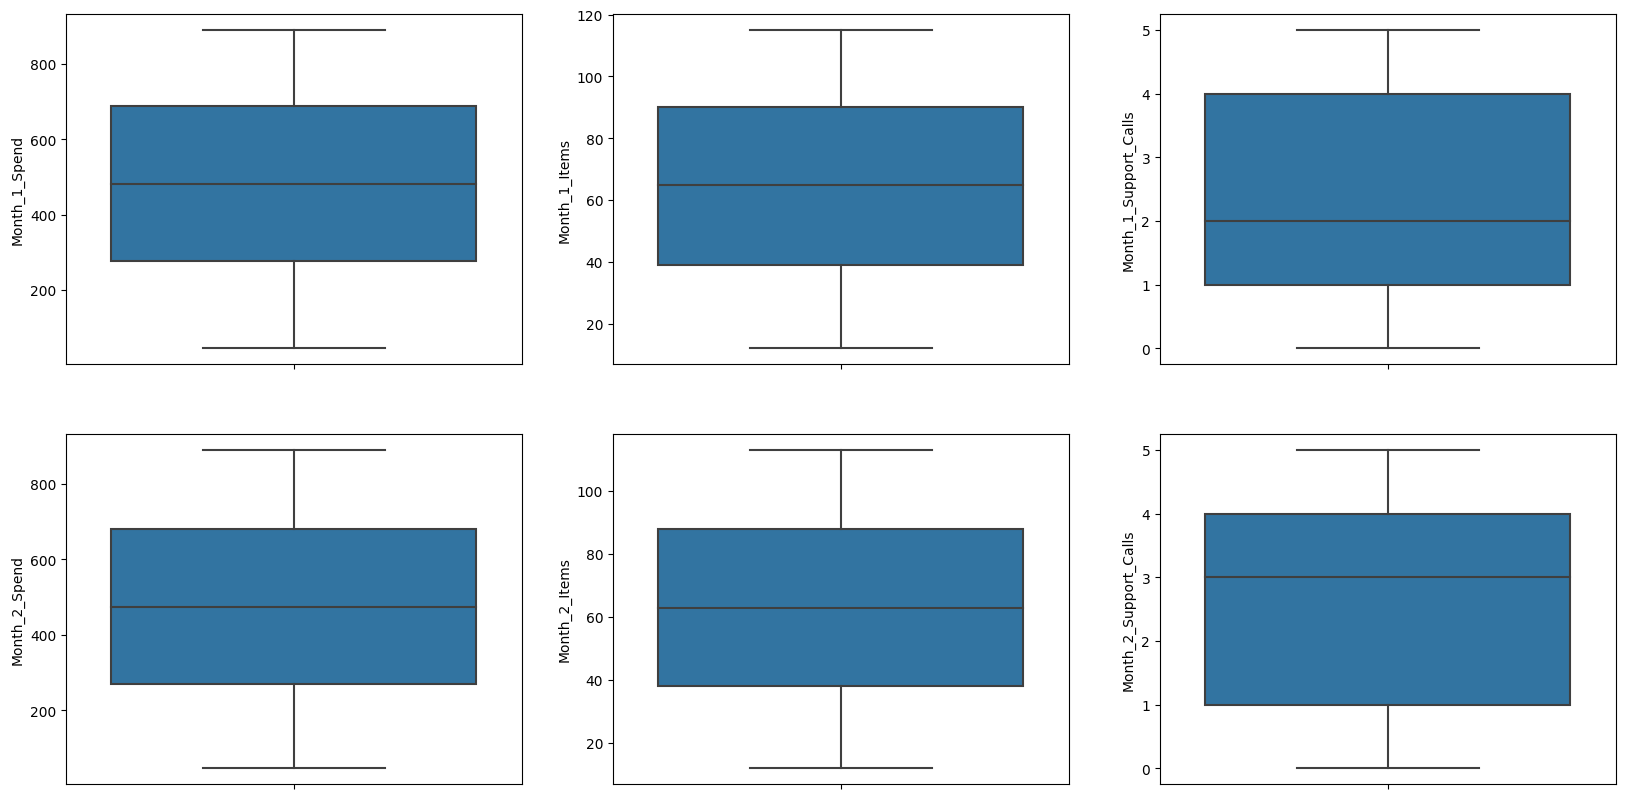

In [665]:
# Let's see if there is any outlier
# Check Month 1 and 2 first
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(data = df, y='Month_1_Spend', ax=ax1)
sns.boxplot(data = df, y='Month_1_Items', ax=ax2)
sns.boxplot(data = df, y='Month_1_Support_Calls', ax=ax3)
sns.boxplot(data = df, y='Month_2_Spend', ax=ax4)
sns.boxplot(data = df, y='Month_2_Items', ax=ax5)
sns.boxplot(data = df, y='Month_2_Support_Calls', ax=ax6)

<Axes: ylabel='Month_4_Support_Calls'>

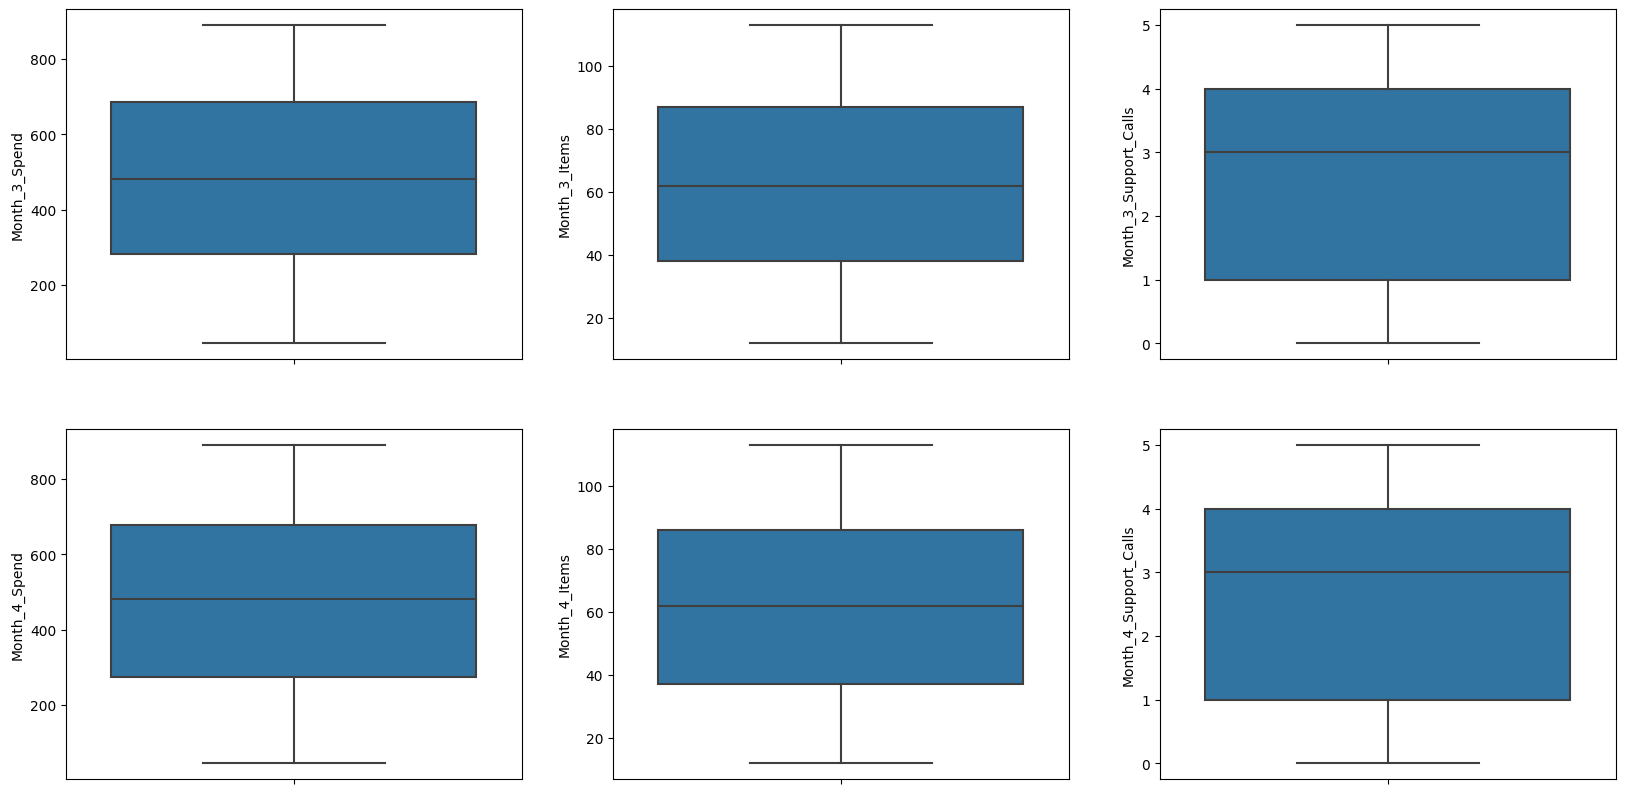

In [666]:
# Month 3/4
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(data = df, y='Month_3_Spend', ax=ax1)
sns.boxplot(data = df, y='Month_3_Items', ax=ax2)
sns.boxplot(data = df, y='Month_3_Support_Calls', ax=ax3)
sns.boxplot(data = df, y='Month_4_Spend', ax=ax4)
sns.boxplot(data = df, y='Month_4_Items', ax=ax5)
sns.boxplot(data = df, y='Month_4_Support_Calls', ax=ax6)

<Axes: ylabel='Month_6_Support_Calls'>

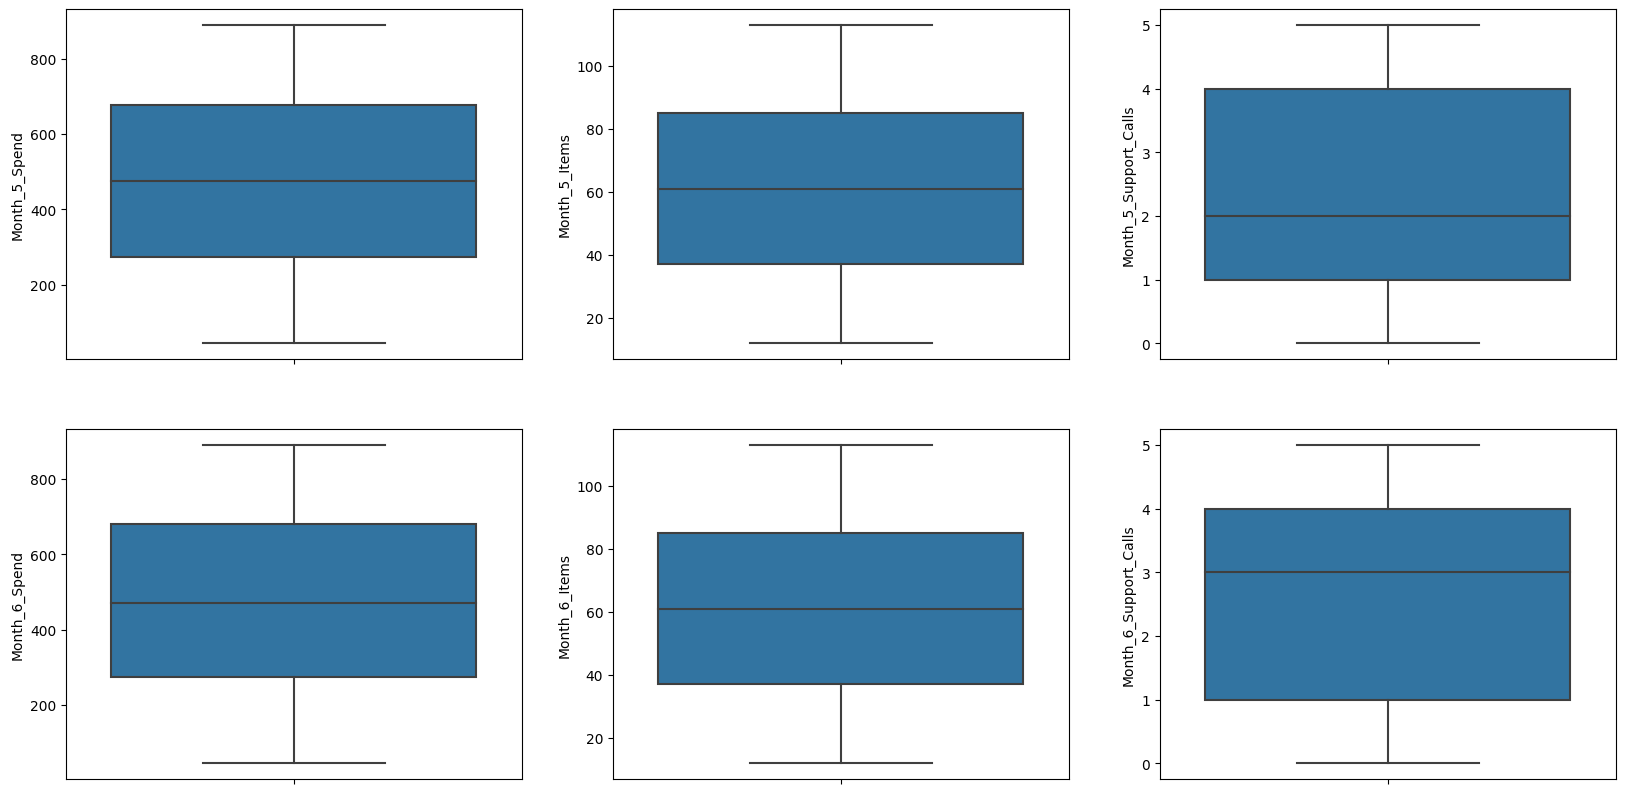

In [667]:
# Month 5/ 6
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(data = df, y='Month_5_Spend', ax=ax1)
sns.boxplot(data = df, y='Month_5_Items', ax=ax2)
sns.boxplot(data = df, y='Month_5_Support_Calls', ax=ax3)
sns.boxplot(data = df, y='Month_6_Spend', ax=ax4)
sns.boxplot(data = df, y='Month_6_Items', ax=ax5)
sns.boxplot(data = df, y='Month_6_Support_Calls', ax=ax6)

<Axes: ylabel='Month_8_Support_Calls'>

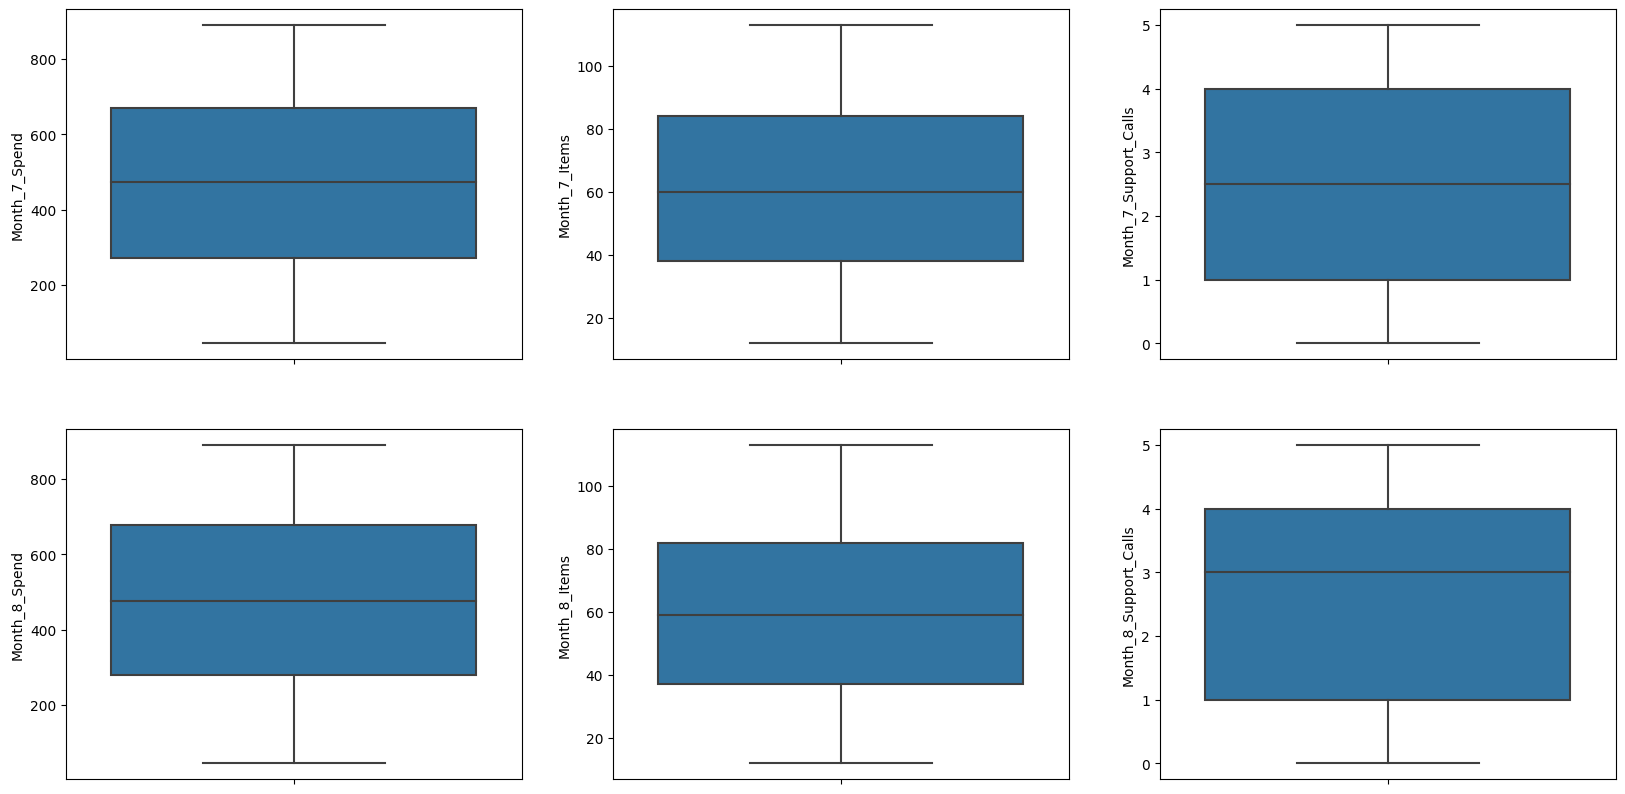

In [668]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(data = df, y='Month_7_Spend', ax=ax1)
sns.boxplot(data = df, y='Month_7_Items', ax=ax2)
sns.boxplot(data = df, y='Month_7_Support_Calls', ax=ax3)
sns.boxplot(data = df, y='Month_8_Spend', ax=ax4)
sns.boxplot(data = df, y='Month_8_Items', ax=ax5)
sns.boxplot(data = df, y='Month_8_Support_Calls', ax=ax6)

<Axes: ylabel='Month_10_Support_Calls'>

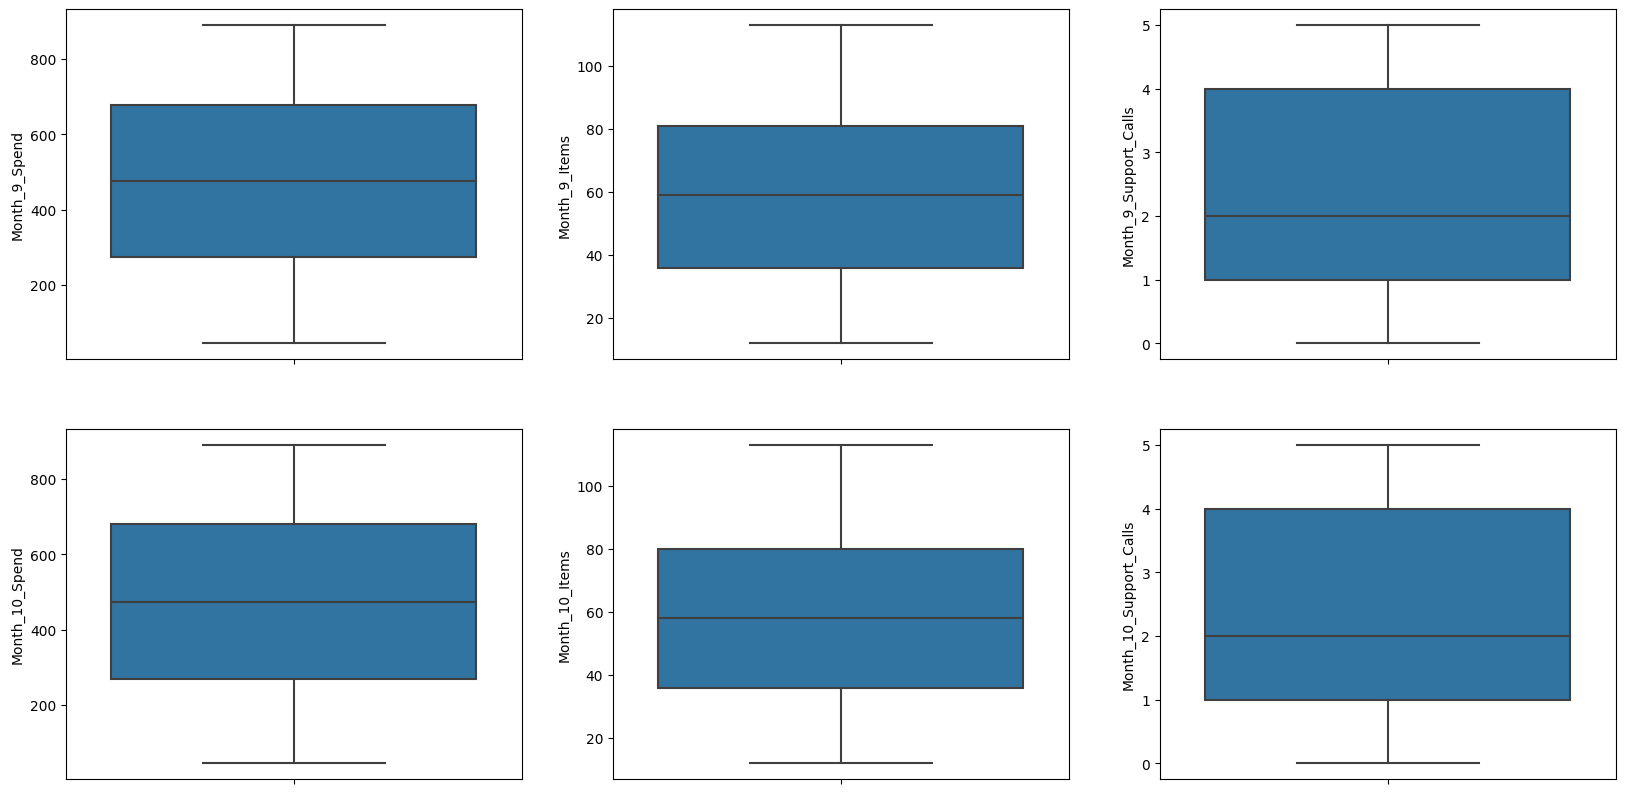

In [669]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(data = df, y='Month_9_Spend', ax=ax1)
sns.boxplot(data = df, y='Month_9_Items', ax=ax2)
sns.boxplot(data = df, y='Month_9_Support_Calls', ax=ax3)
sns.boxplot(data = df, y='Month_10_Spend', ax=ax4)
sns.boxplot(data = df, y='Month_10_Items', ax=ax5)
sns.boxplot(data = df, y='Month_10_Support_Calls', ax=ax6)

<Axes: ylabel='Month_12_Support_Calls'>

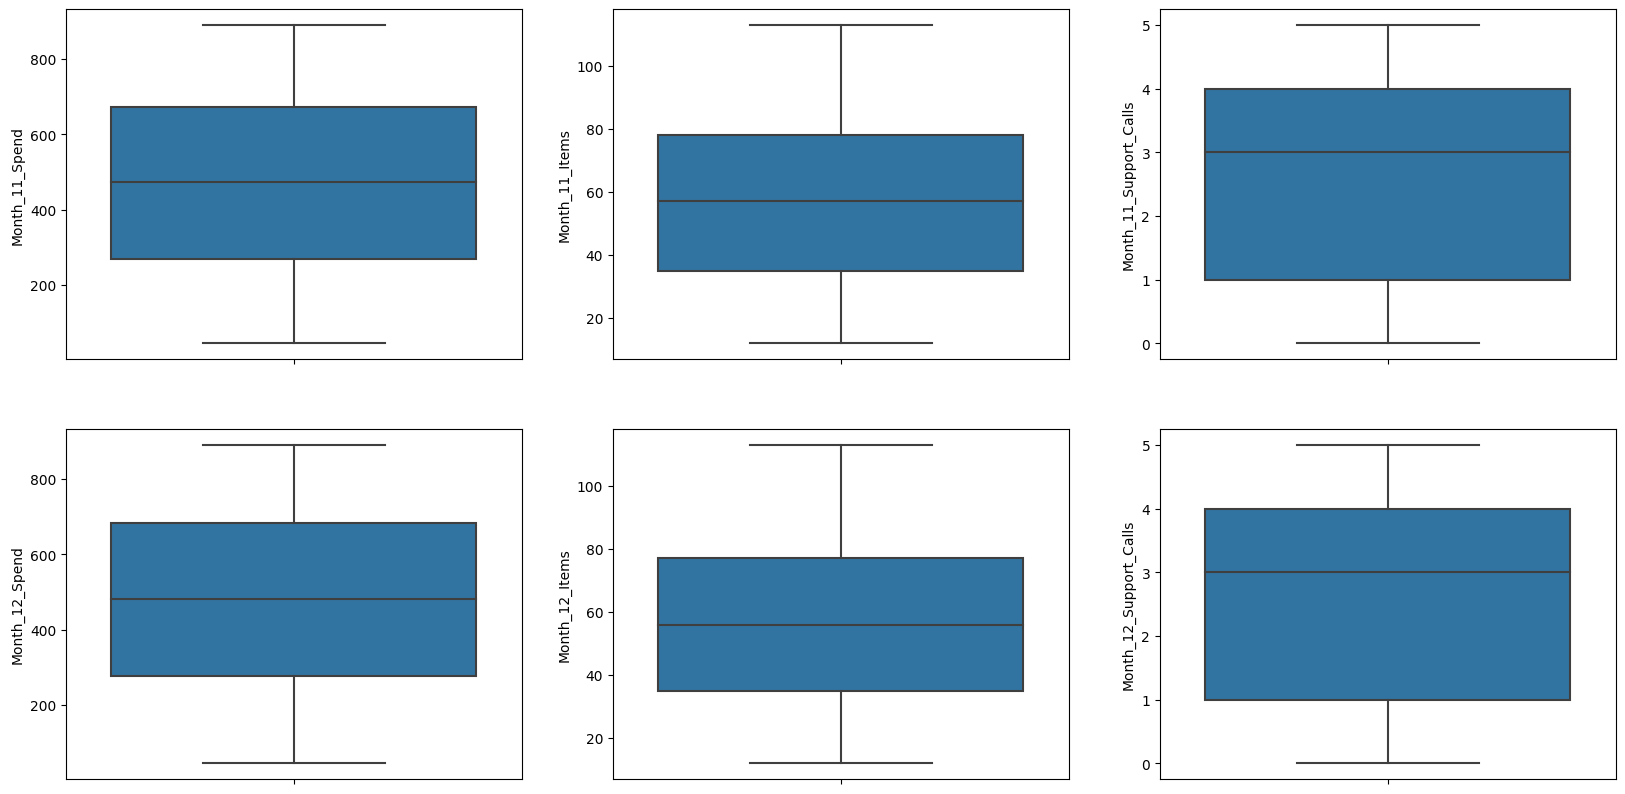

In [670]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(data = df, y='Month_11_Spend', ax=ax1)
sns.boxplot(data = df, y='Month_11_Items', ax=ax2)
sns.boxplot(data = df, y='Month_11_Support_Calls', ax=ax3)
sns.boxplot(data = df, y='Month_12_Spend', ax=ax4)
sns.boxplot(data = df, y='Month_12_Items', ax=ax5)
sns.boxplot(data = df, y='Month_12_Support_Calls', ax=ax6)

In [671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     10000 non-null  int64  
 1   Location                10000 non-null  object 
 2   Device                  10000 non-null  object 
 3   Month_1_Spend           10000 non-null  float64
 4   Month_1_Items           10000 non-null  int64  
 5   Month_1_Support_Calls   10000 non-null  int64  
 6   Month_2_Spend           10000 non-null  float64
 7   Month_2_Items           10000 non-null  int64  
 8   Month_2_Support_Calls   10000 non-null  int64  
 9   Month_3_Spend           10000 non-null  float64
 10  Month_3_Items           10000 non-null  int64  
 11  Month_3_Support_Calls   10000 non-null  int64  
 12  Month_4_Spend           10000 non-null  float64
 13  Month_4_Items           10000 non-null  int64  
 14  Month_4_Support_Calls   10000 non-null  int

There seems no oulier in this data. Perfectly!

Now, we are finished the data cleaning part. Let's move on to the data exploration part!

# 4. Data exploration

In [672]:
df.groupby(['Churn', 'Location'])['Month_1_Spend'].count().unstack()

Location,Australia,Canada,Great Britain,US
Churn,,,,
0,725.0,763.0,762.0,750.0
1,NaN,3495.0,NaN,3505.0


In [673]:
df.groupby(['Churn', 'Device'])['Month_1_Spend'].count().unstack()

Device,Android,iOS
Churn,,
0,896,2104
1,4840,2160


Based on those two ananlysis we could find that People from US and Canada more perfer to churn. Also, People who use the Android are more per to Churn!

In [674]:
df.groupby(['Device', 'Location'])['Month_1_Spend'].count().unstack()

Location,Australia,Canada,Great Britain,US
Device,,,,
Android,216,2693,233,2594
iOS,509,1565,529,1661


This one showes that our customer maining come from US and Canada, and customer who use Android more than Andriod.

In [675]:
df.describe()

,Age,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,Month_3_Items,Month_3_Support_Calls,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,42.698500,482.593336,64.657700,2.488800,476.297118,63.118000,2.517400,481.965314,62.871600,2.515100,...,473.630524,58.227900,2.487000,472.671126,56.968900,2.519500,478.629330,56.512600,2.496300,0.70000
std,12.495528,237.961476,29.329527,1.711306,237.491820,28.933247,1.703639,235.535388,28.373477,1.704952,...,235.090366,25.909251,1.721083,234.288930,25.615119,1.702266,233.135282,25.263995,1.713674,0.45828
min,20.000000,45.147050,12.000000,0.000000,46.283232,12.000000,0.000000,45.792390,12.000000,0.000000,...,45.784922,12.000000,0.000000,45.139863,12.000000,0.000000,45.093583,12.000000,0.000000,0.00000
25%,32.000000,275.978779,39.000000,1.000000,268.427326,38.000000,1.000000,283.141582,38.000000,1.000000,...,268.470286,36.000000,1.000000,269.432095,35.000000,1.000000,276.507055,35.000000,1.000000,0.00000
50%,43.000000,482.173250,65.000000,2.000000,474.442784,63.000000,3.000000,480.440066,62.000000,3.000000,...,472.391691,58.000000,2.000000,472.530676,57.000000,3.000000,481.872558,56.000000,3.000000,1.00000
75%,53.000000,688.898992,90.000000,4.000000,680.824377,88.000000,4.000000,684.508894,87.000000,4.000000,...,680.923305,80.000000,4.000000,673.599392,78.000000,4.000000,681.397961,77.000000,4.000000,1.00000
max,65.000000,889.597940,115.000000,5.000000,889.712540,113.000000,5.000000,889.756303,113.000000,5.000000,...,889.979951,113.000000,5.000000,889.998913,113.000000,5.000000,889.612221,113.000000,5.000000,1.00000


In [676]:
df.groupby('Location').count()

,Age,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,Month_3_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
Location,,,,,,,,,,,,,,,,,,,,,
Australia,725,725,725,725,725,725,725,725,725,725,...,725,725,725,725,725,725,725,725,725,725
Canada,4258,4258,4258,4258,4258,4258,4258,4258,4258,4258,...,4258,4258,4258,4258,4258,4258,4258,4258,4258,4258
Great Britain,762,762,762,762,762,762,762,762,762,762,...,762,762,762,762,762,762,762,762,762,762
US,4255,4255,4255,4255,4255,4255,4255,4255,4255,4255,...,4255,4255,4255,4255,4255,4255,4255,4255,4255,4255


In [677]:
df.groupby('Device').count()

,Age,Location,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,Month_3_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
Device,,,,,,,,,,,,,,,,,,,,,
Android,5736,5736,5736,5736,5736,5736,5736,5736,5736,5736,...,5736,5736,5736,5736,5736,5736,5736,5736,5736,5736
iOS,4264,4264,4264,4264,4264,4264,4264,4264,4264,4264,...,4264,4264,4264,4264,4264,4264,4264,4264,4264,4264


In [678]:
df.groupby('Age').count()

,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,Month_3_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
Age,,,,,,,,,,,,,,,,,,,,,
20,154,154,154,154,154,154,154,154,154,154,...,154,154,154,154,154,154,154,154,154,154
21,154,154,154,154,154,154,154,154,154,154,...,154,154,154,154,154,154,154,154,154,154
22,158,158,158,158,158,158,158,158,158,158,...,158,158,158,158,158,158,158,158,158,158
23,153,153,153,153,153,153,153,153,153,153,...,153,153,153,153,153,153,153,153,153,153
24,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132
25,191,191,191,191,191,191,191,191,191,191,...,191,191,191,191,191,191,191,191,191,191
26,238,238,238,238,238,238,238,238,238,238,...,238,238,238,238,238,238,238,238,238,238
27,249,249,249,249,249,249,249,249,249,249,...,249,249,249,249,249,249,249,249,249,249
28,242,242,242,242,242,242,242,242,242,242,...,242,242,242,242,242,242,242,242,242,242


<Axes: xlabel='Location', ylabel='Count'>

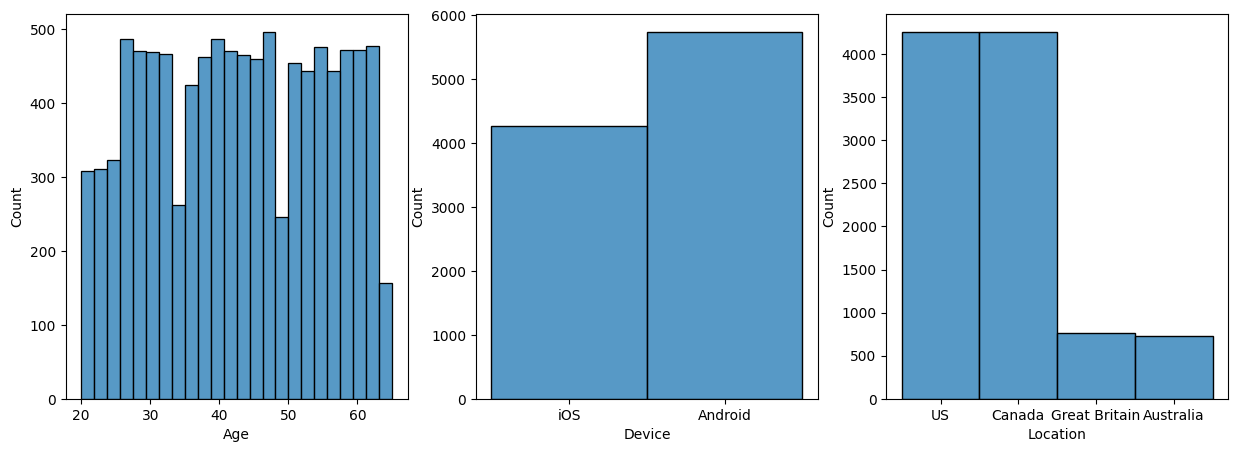

In [679]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Age'], ax=ax1)
sns.histplot(df['Device'], ax=ax2)
sns.histplot(df['Location'], ax=ax3)

Base on this one, we find also customer maining from US and Canada

<Axes: xlabel='Month_1_Support_Calls', ylabel='Count'>

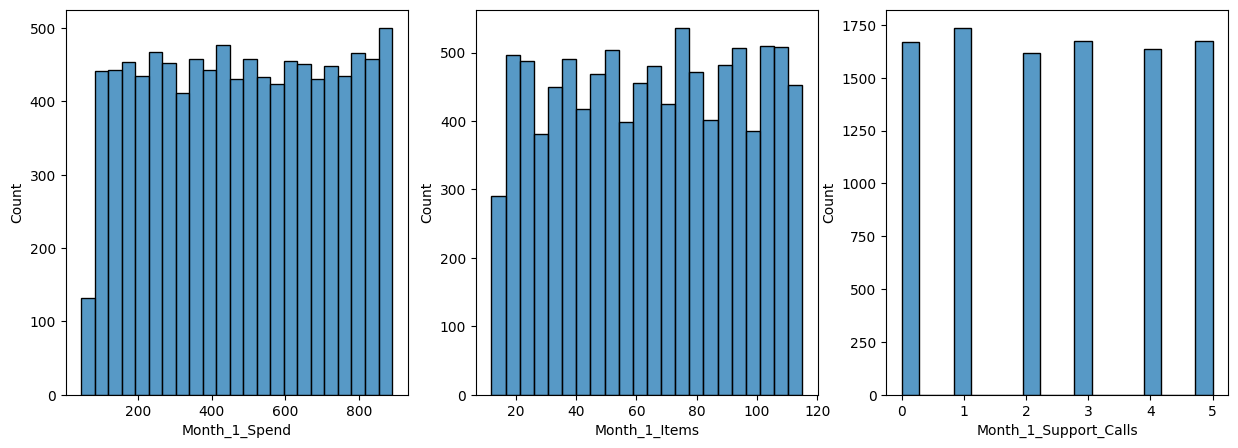

In [680]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_1_Spend'], ax=ax1)
sns.histplot(df['Month_1_Items'], ax=ax2)
sns.histplot(df['Month_1_Support_Calls'], ax=ax3)

<Axes: xlabel='Month_2_Support_Calls', ylabel='Count'>

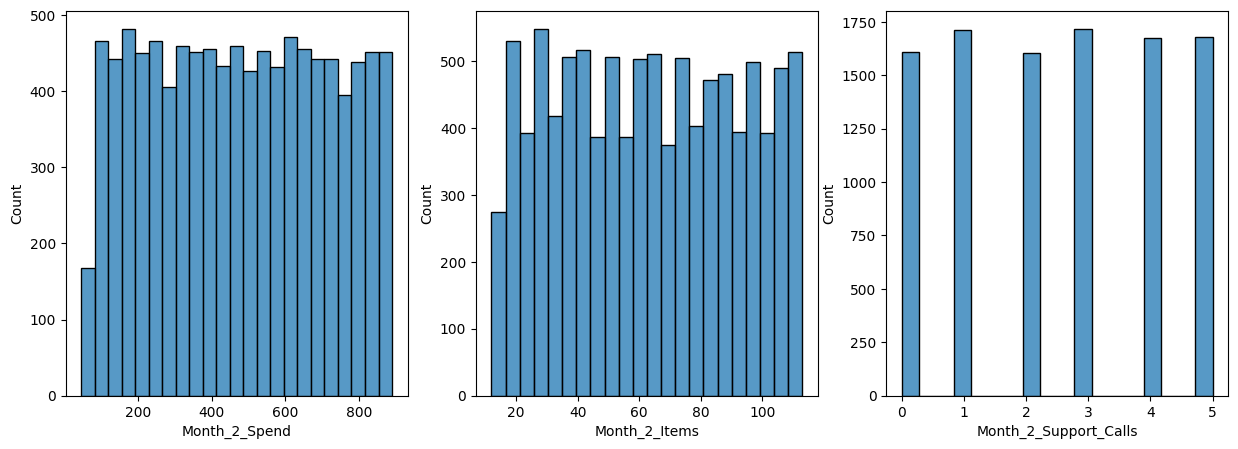

In [681]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_2_Spend'], ax=ax1)
sns.histplot(df['Month_2_Items'], ax=ax2)
sns.histplot(df['Month_2_Support_Calls'], ax=ax3)

<Axes: xlabel='Month_3_Support_Calls', ylabel='Count'>

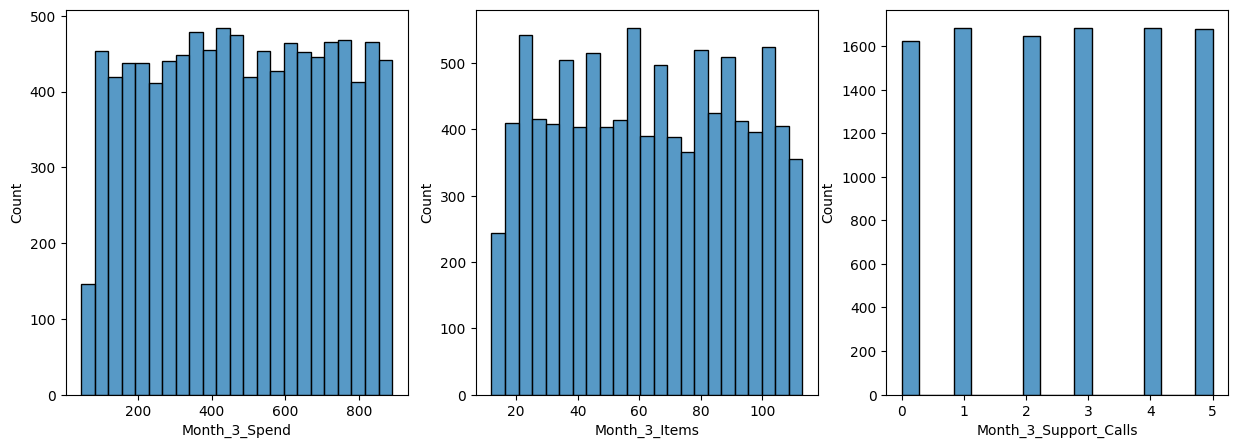

In [682]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_3_Spend'], ax=ax1)
sns.histplot(df['Month_3_Items'], ax=ax2)
sns.histplot(df['Month_3_Support_Calls'], ax=ax3)

<Axes: xlabel='Month_4_Support_Calls', ylabel='Count'>

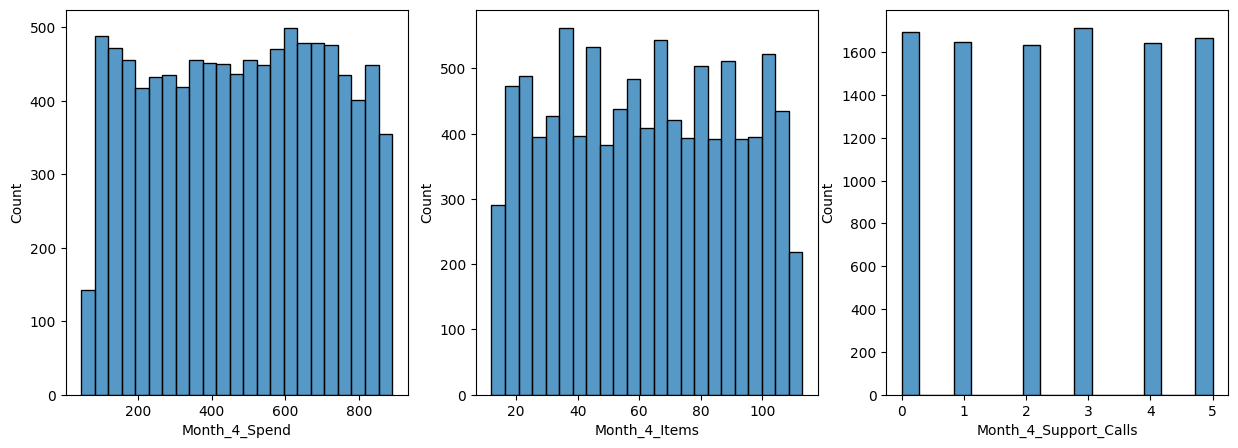

In [683]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_4_Spend'], ax=ax1)
sns.histplot(df['Month_4_Items'], ax=ax2)
sns.histplot(df['Month_4_Support_Calls'], ax=ax3)

<Axes: xlabel='Month_5_Support_Calls', ylabel='Count'>

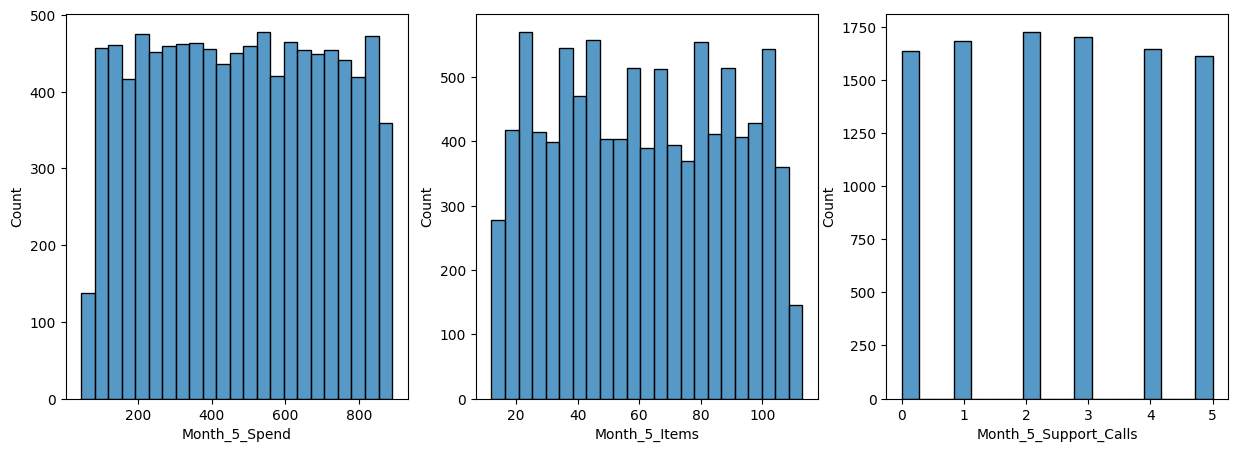

In [684]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_5_Spend'], ax=ax1)
sns.histplot(df['Month_5_Items'], ax=ax2)
sns.histplot(df['Month_5_Support_Calls'], ax=ax3)

<Axes: xlabel='Month_6_Support_Calls', ylabel='Count'>

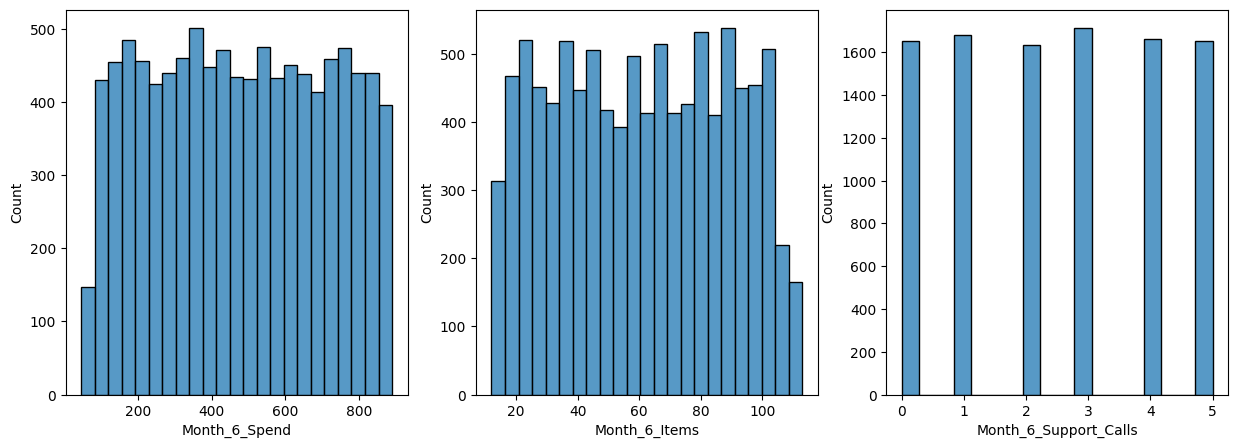

In [685]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_6_Spend'], ax=ax1)
sns.histplot(df['Month_6_Items'], ax=ax2)
sns.histplot(df['Month_6_Support_Calls'], ax=ax3)

<Axes: xlabel='Month_7_Support_Calls', ylabel='Count'>

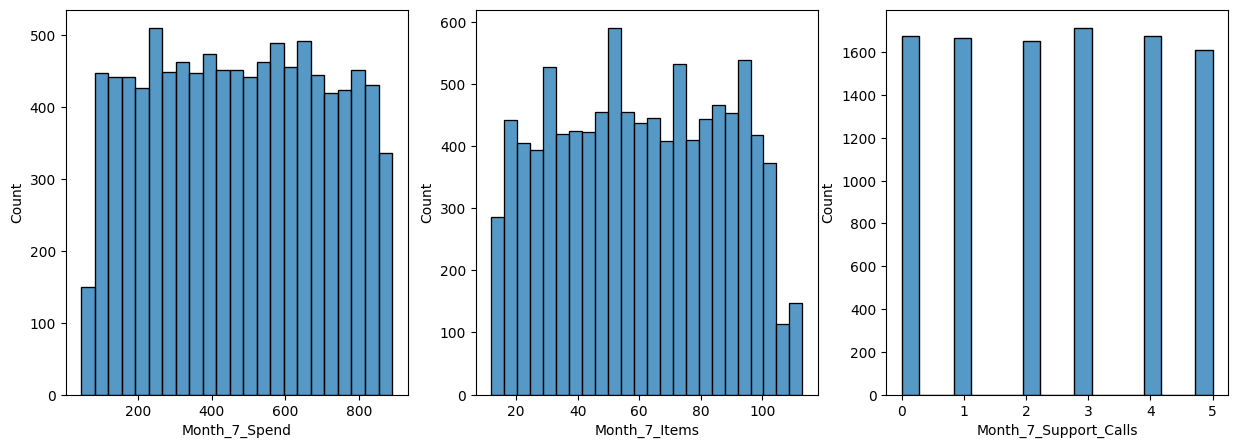

In [686]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_7_Spend'], ax=ax1)
sns.histplot(df['Month_7_Items'], ax=ax2)
sns.histplot(df['Month_7_Support_Calls'], ax=ax3)

<Axes: xlabel='Month_8_Support_Calls', ylabel='Count'>

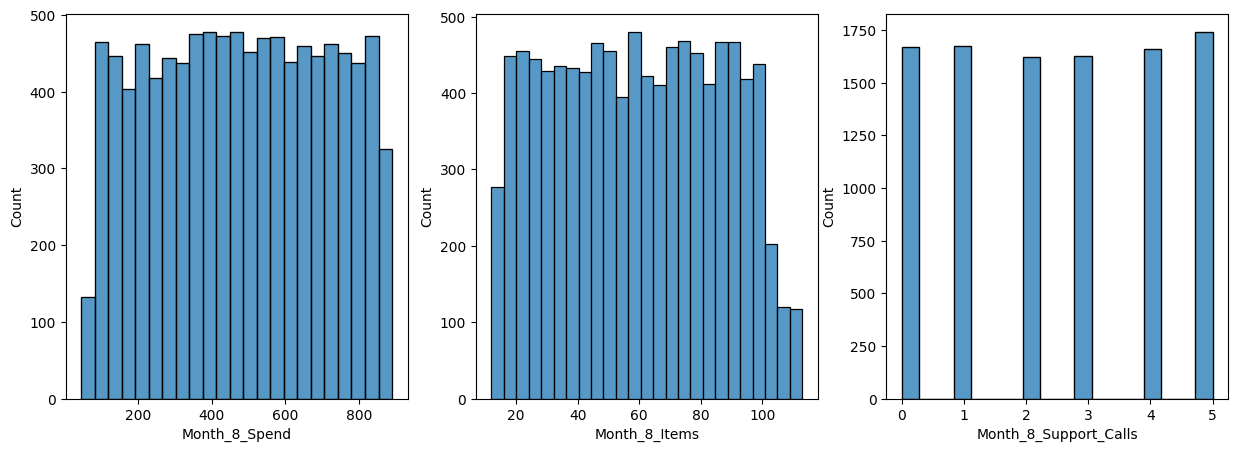

In [687]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_8_Spend'], ax=ax1)
sns.histplot(df['Month_8_Items'], ax=ax2)
sns.histplot(df['Month_8_Support_Calls'], ax=ax3)

<Axes: xlabel='Month_9_Support_Calls', ylabel='Count'>

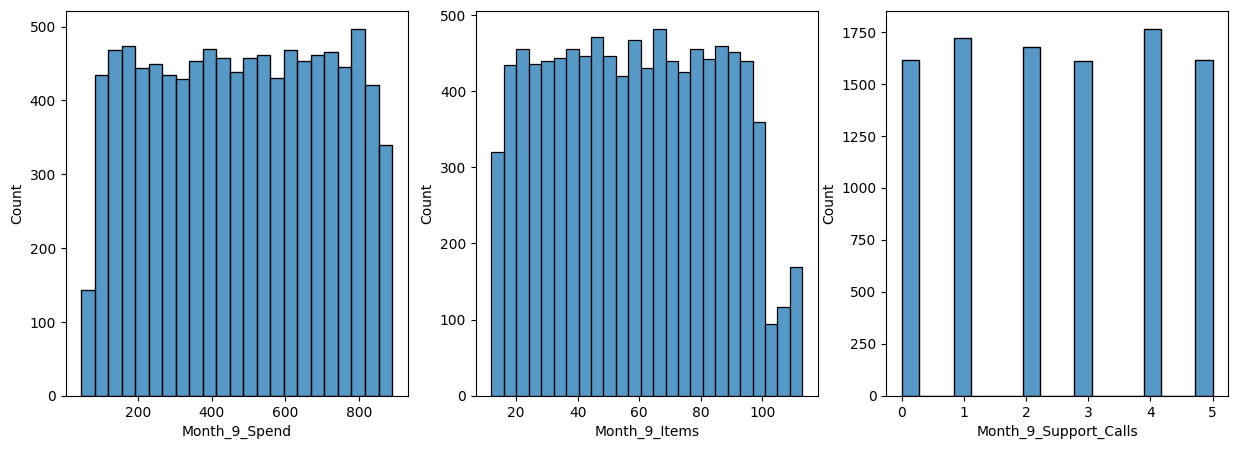

In [688]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_9_Spend'], ax=ax1)
sns.histplot(df['Month_9_Items'], ax=ax2)
sns.histplot(df['Month_9_Support_Calls'], ax=ax3)

<Axes: xlabel='Month_10_Support_Calls', ylabel='Count'>

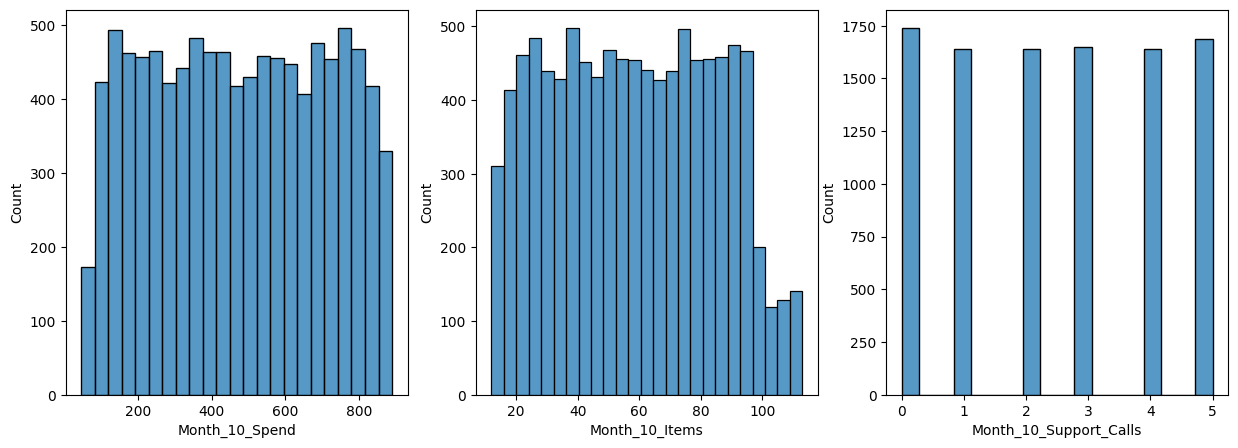

In [689]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_10_Spend'], ax=ax1)
sns.histplot(df['Month_10_Items'], ax=ax2)
sns.histplot(df['Month_10_Support_Calls'], ax=ax3)

<Axes: xlabel='Month_11_Support_Calls', ylabel='Count'>

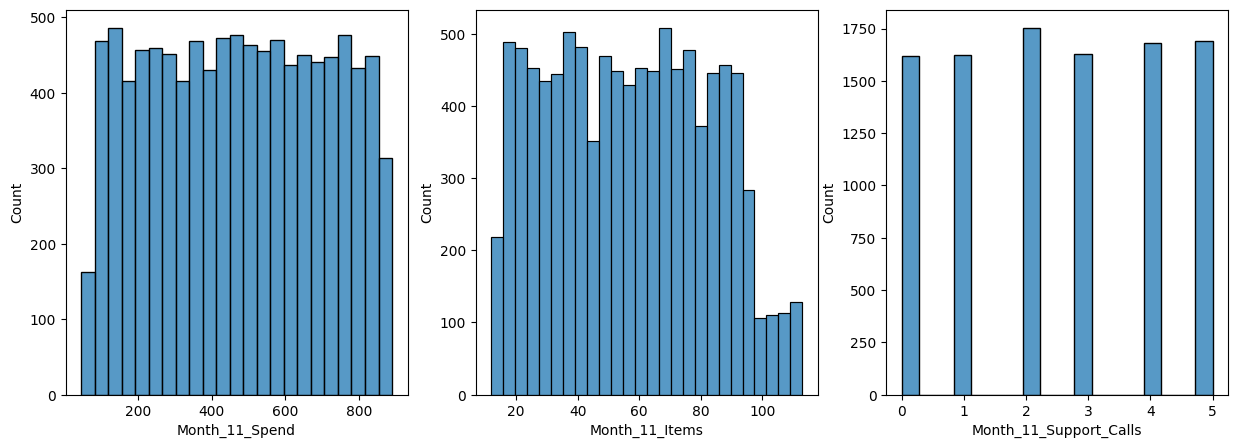

In [690]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_11_Spend'], ax=ax1)
sns.histplot(df['Month_11_Items'], ax=ax2)
sns.histplot(df['Month_11_Support_Calls'], ax=ax3)

<Axes: xlabel='Month_12_Support_Calls', ylabel='Count'>

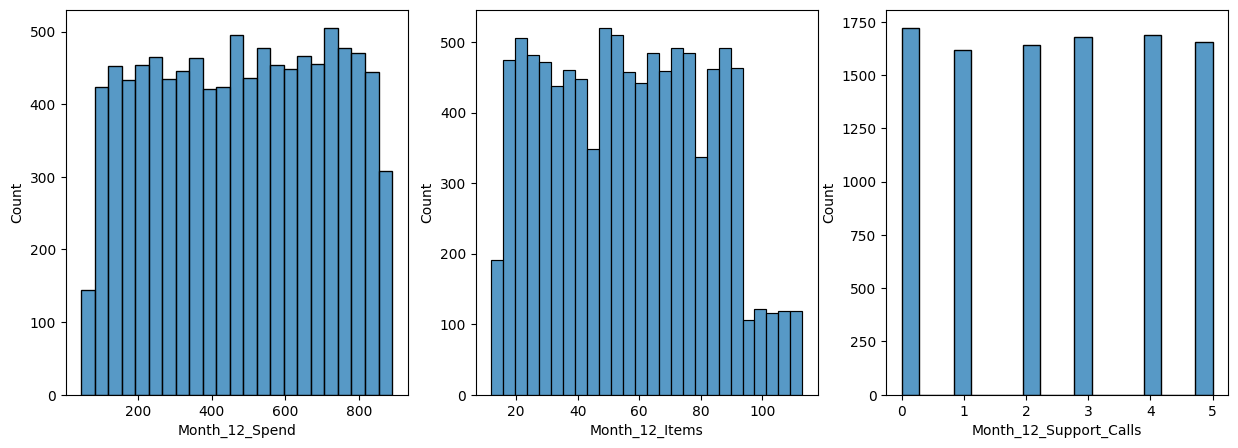

In [691]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Month_12_Spend'], ax=ax1)
sns.histplot(df['Month_12_Items'], ax=ax2)
sns.histplot(df['Month_12_Support_Calls'], ax=ax3)

In [692]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     10000 non-null  int64  
 1   Location                10000 non-null  object 
 2   Device                  10000 non-null  object 
 3   Month_1_Spend           10000 non-null  float64
 4   Month_1_Items           10000 non-null  int64  
 5   Month_1_Support_Calls   10000 non-null  int64  
 6   Month_2_Spend           10000 non-null  float64
 7   Month_2_Items           10000 non-null  int64  
 8   Month_2_Support_Calls   10000 non-null  int64  
 9   Month_3_Spend           10000 non-null  float64
 10  Month_3_Items           10000 non-null  int64  
 11  Month_3_Support_Calls   10000 non-null  int64  
 12  Month_4_Spend           10000 non-null  float64
 13  Month_4_Items           10000 non-null  int64  
 14  Month_4_Support_Calls   10000 non-null  int

<Axes: xlabel='Churn', ylabel='Age'>

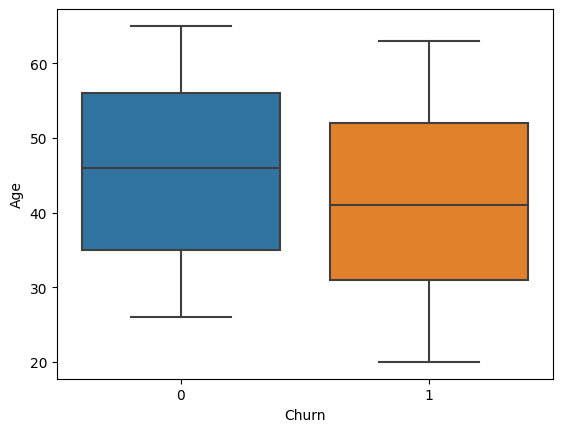

In [693]:
sns.boxplot(x='Churn',y='Age', data=df)


Based this one, we find people with higher age will not Churn

<Axes: xlabel='Churn', ylabel='Month_1_Support_Calls'>

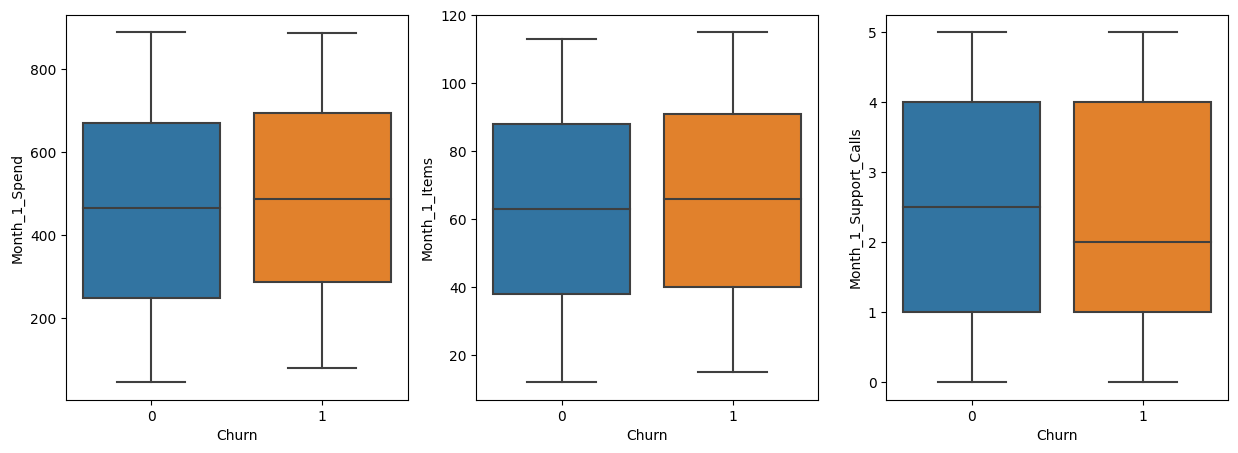

In [694]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Churn',y='Month_1_Spend', data=df, ax=ax1)
sns.boxplot(x='Churn',y='Month_1_Items',data=df, ax=ax2)
sns.boxplot(x='Churn',y='Month_1_Support_Calls', data=df, ax=ax3)

<Axes: xlabel='Churn', ylabel='Month_2_Support_Calls'>

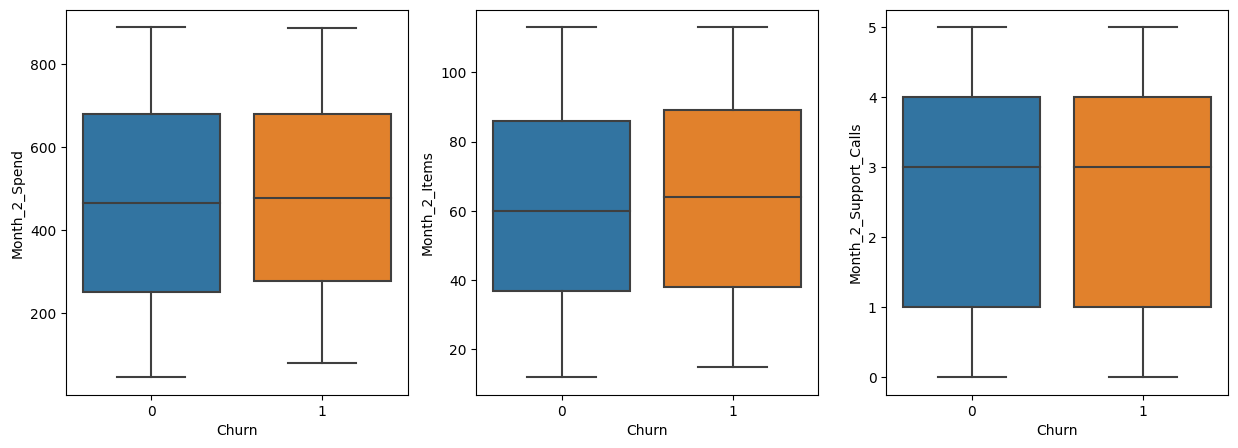

In [695]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Churn',y='Month_2_Spend', data=df, ax=ax1)
sns.boxplot(x='Churn',y='Month_2_Items',data=df, ax=ax2)
sns.boxplot(x='Churn',y='Month_2_Support_Calls', data=df, ax=ax3)

<Axes: xlabel='Churn', ylabel='Month_3_Support_Calls'>

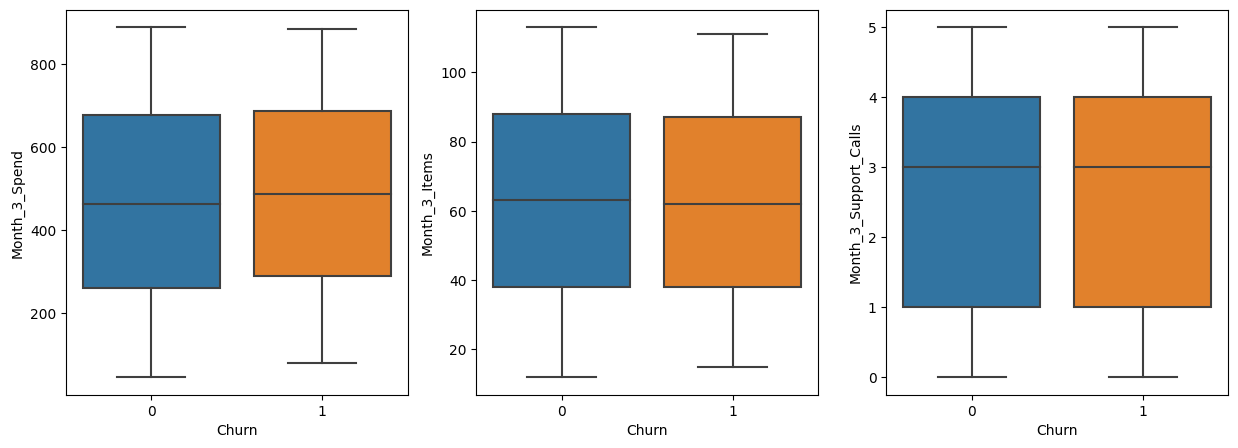

In [696]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Churn',y='Month_3_Spend', data=df, ax=ax1)
sns.boxplot(x='Churn',y='Month_3_Items',data=df, ax=ax2)
sns.boxplot(x='Churn',y='Month_3_Support_Calls', data=df, ax=ax3)

<Axes: xlabel='Churn', ylabel='Month_4_Support_Calls'>

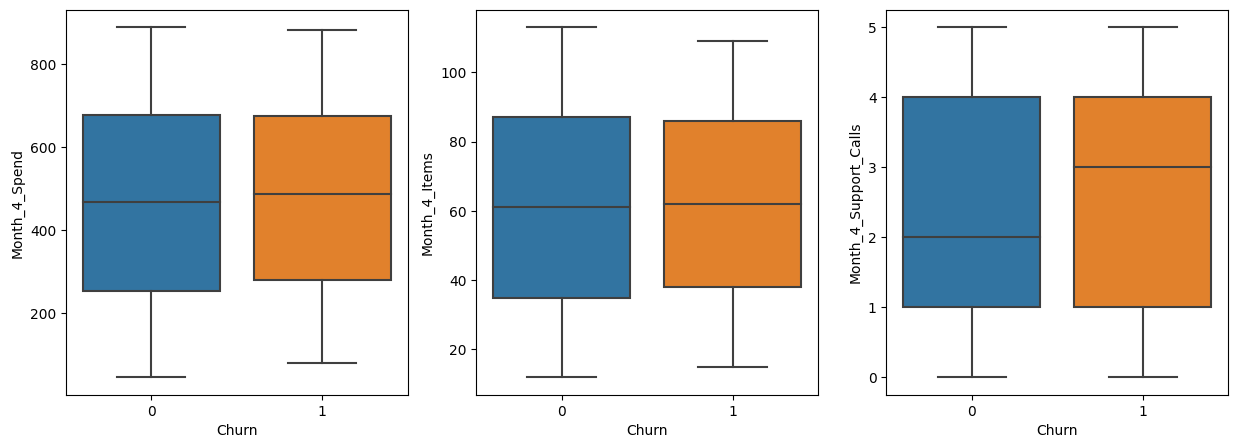

In [697]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Churn',y='Month_4_Spend', data=df, ax=ax1)
sns.boxplot(x='Churn',y='Month_4_Items',data=df, ax=ax2)
sns.boxplot(x='Churn',y='Month_4_Support_Calls', data=df, ax=ax3)

<Axes: xlabel='Churn', ylabel='Month_5_Support_Calls'>

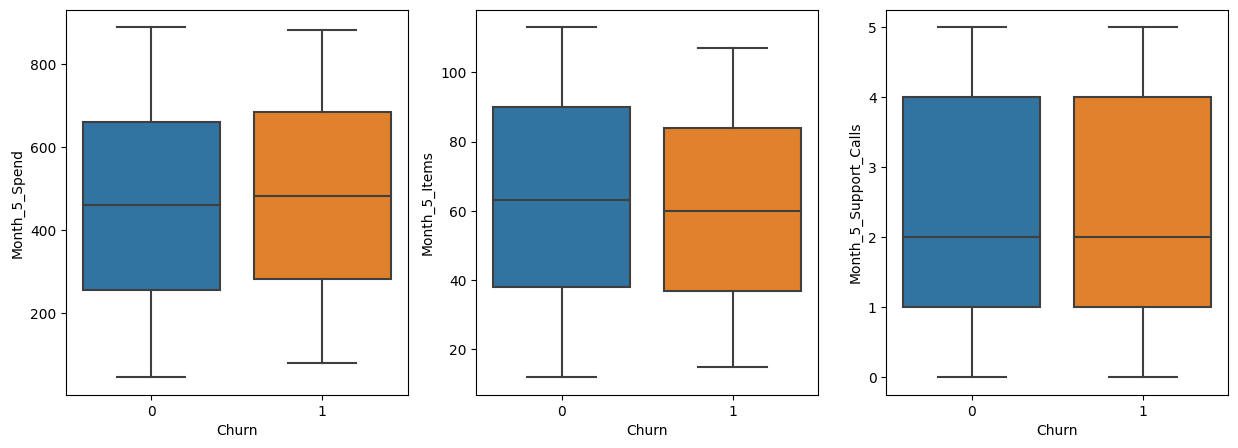

In [698]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Churn',y='Month_5_Spend', data=df, ax=ax1)
sns.boxplot(x='Churn',y='Month_5_Items',data=df, ax=ax2)
sns.boxplot(x='Churn',y='Month_5_Support_Calls', data=df, ax=ax3)

<Axes: xlabel='Churn', ylabel='Month_6_Support_Calls'>

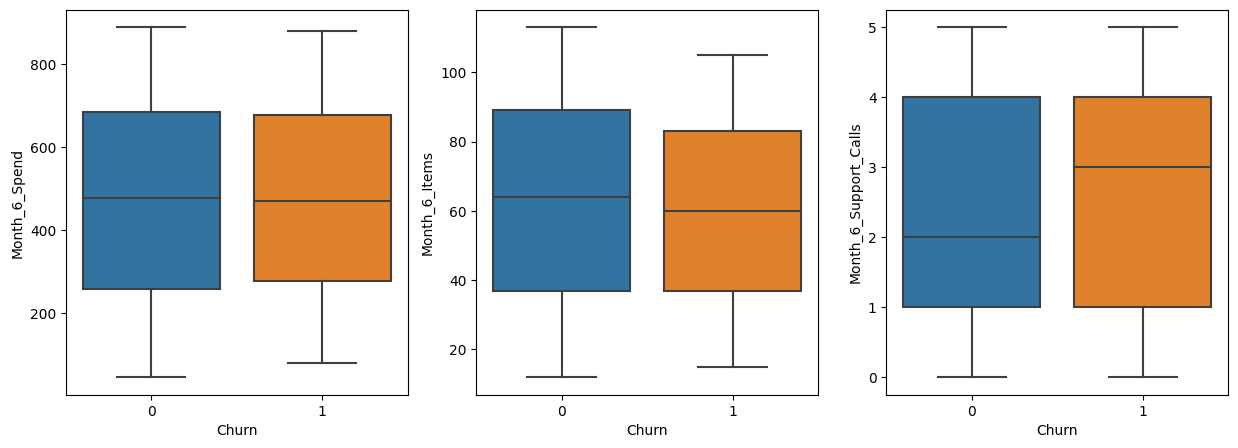

In [699]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Churn',y='Month_6_Spend', data=df, ax=ax1)
sns.boxplot(x='Churn',y='Month_6_Items',data=df, ax=ax2)
sns.boxplot(x='Churn',y='Month_6_Support_Calls', data=df, ax=ax3)

<Axes: xlabel='Churn', ylabel='Month_7_Support_Calls'>

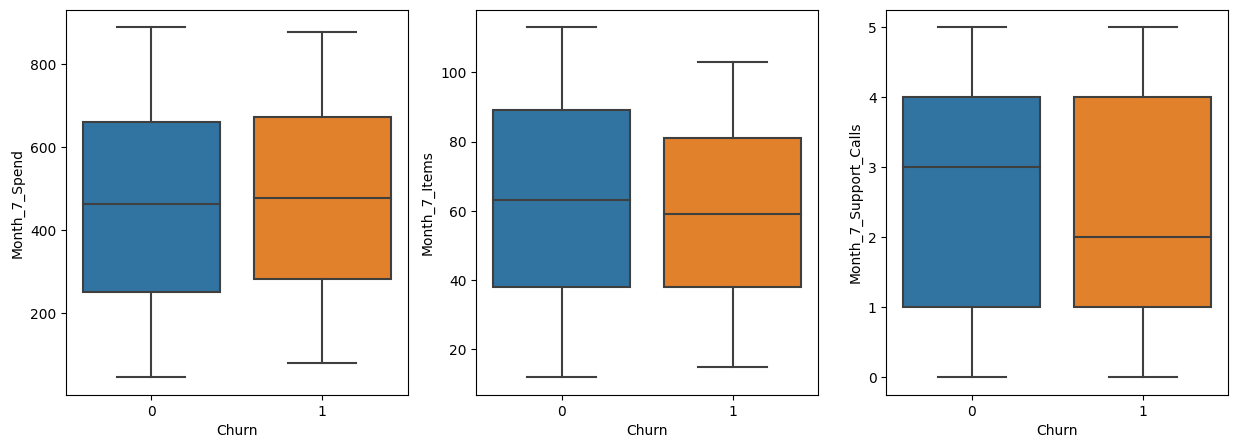

In [700]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Churn',y='Month_7_Spend', data=df, ax=ax1)
sns.boxplot(x='Churn',y='Month_7_Items',data=df, ax=ax2)
sns.boxplot(x='Churn',y='Month_7_Support_Calls', data=df, ax=ax3)

<Axes: xlabel='Churn', ylabel='Month_8_Support_Calls'>

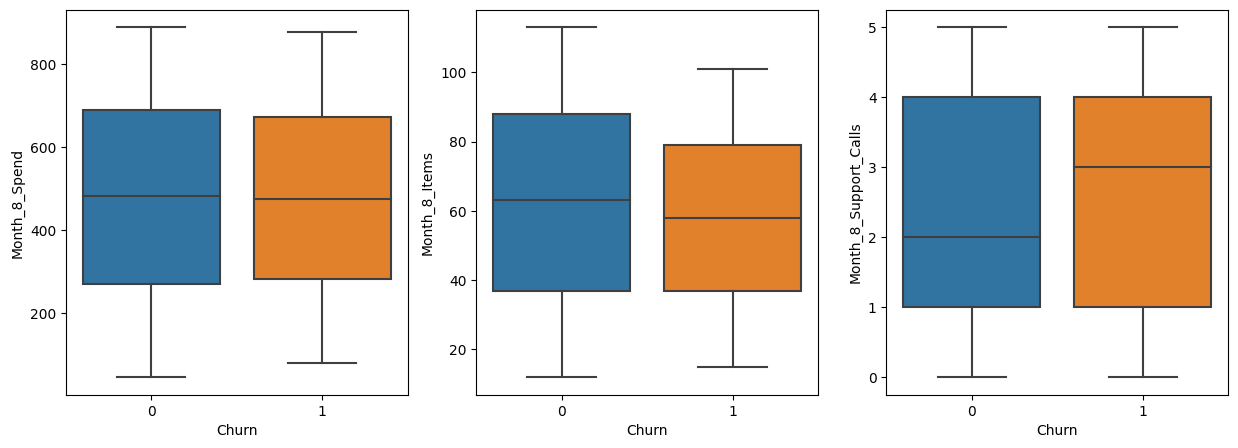

In [701]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Churn',y='Month_8_Spend', data=df, ax=ax1)
sns.boxplot(x='Churn',y='Month_8_Items',data=df, ax=ax2)
sns.boxplot(x='Churn',y='Month_8_Support_Calls', data=df, ax=ax3)

<Axes: xlabel='Churn', ylabel='Month_9_Support_Calls'>

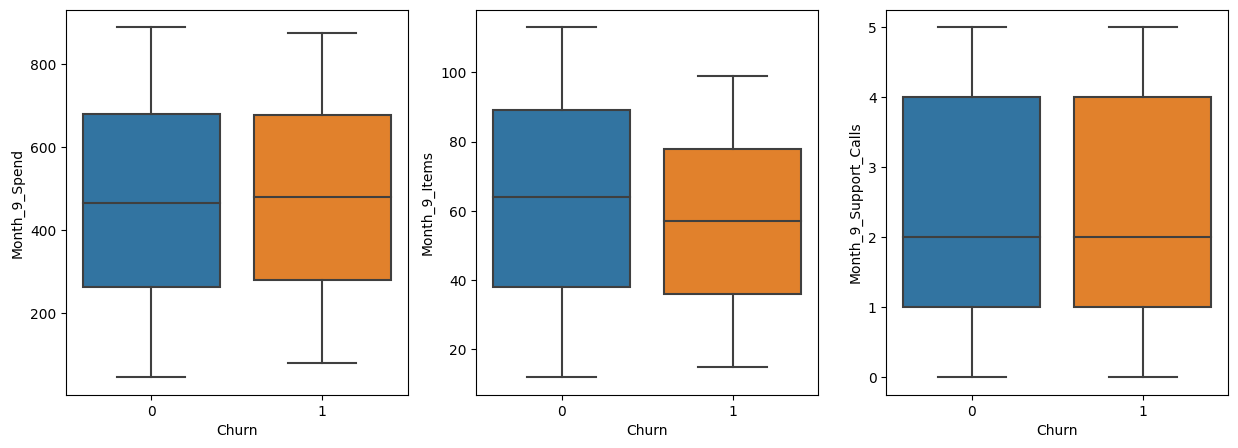

In [702]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Churn',y='Month_9_Spend', data=df, ax=ax1)
sns.boxplot(x='Churn',y='Month_9_Items',data=df, ax=ax2)
sns.boxplot(x='Churn',y='Month_9_Support_Calls', data=df, ax=ax3)

<Axes: xlabel='Churn', ylabel='Month_10_Support_Calls'>

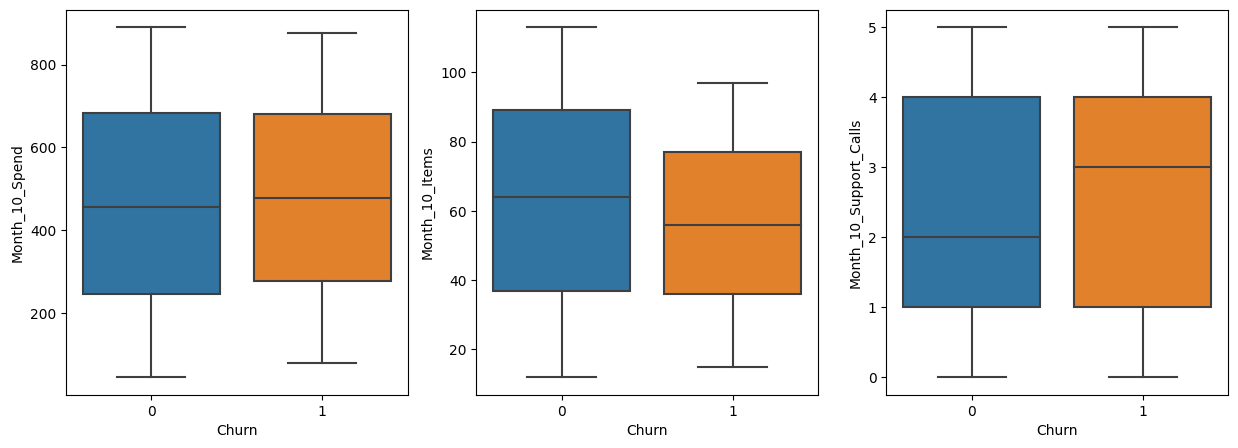

In [703]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Churn',y='Month_10_Spend', data=df, ax=ax1)
sns.boxplot(x='Churn',y='Month_10_Items',data=df, ax=ax2)
sns.boxplot(x='Churn',y='Month_10_Support_Calls', data=df, ax=ax3)

<Axes: xlabel='Churn', ylabel='Month_11_Support_Calls'>

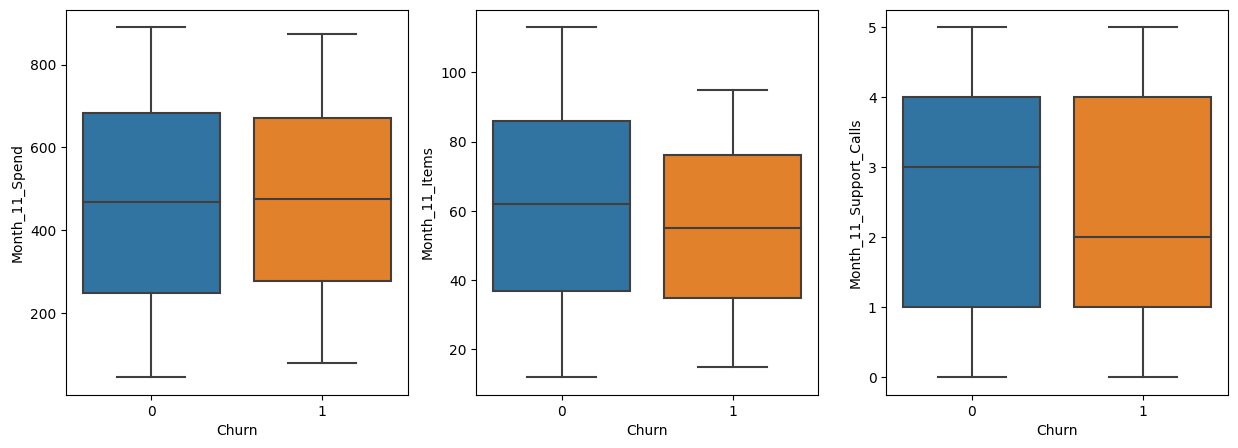

In [704]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Churn',y='Month_11_Spend', data=df, ax=ax1)
sns.boxplot(x='Churn',y='Month_11_Items',data=df, ax=ax2)
sns.boxplot(x='Churn',y='Month_11_Support_Calls', data=df, ax=ax3)

<Axes: xlabel='Churn', ylabel='Month_12_Support_Calls'>

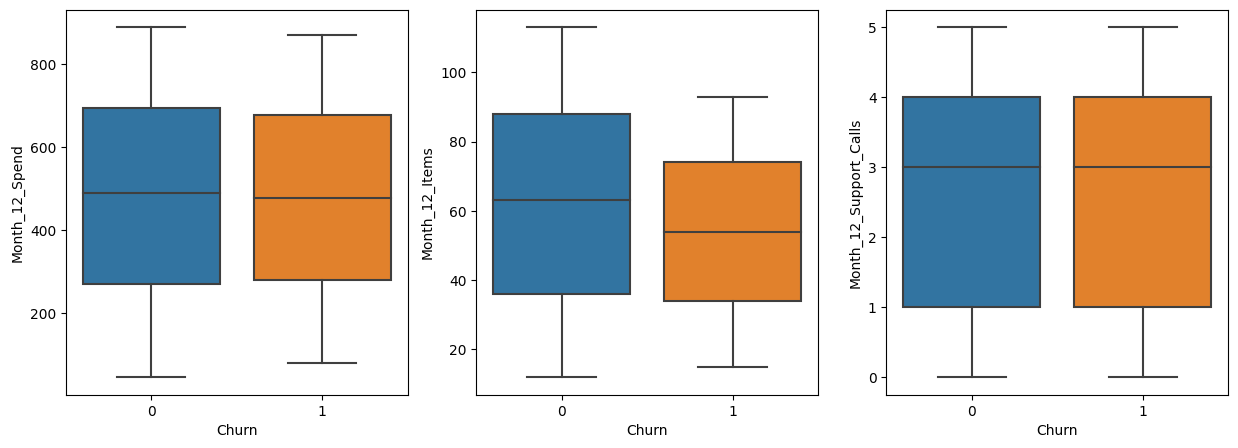

In [705]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='Churn',y='Month_12_Spend', data=df, ax=ax1)
sns.boxplot(x='Churn',y='Month_12_Items',data=df, ax=ax2)
sns.boxplot(x='Churn',y='Month_12_Support_Calls', data=df, ax=ax3)

## Inital hypothesis

Based on those ananlysis, we could find that People from US and Canada more perfer to churn. Also, People who use the Android are more per to Churn!

# 5. Feature engineering

In [706]:
df.describe(include='all')

,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Canada,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4258,5736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,42.698500,NaN,NaN,482.593336,64.657700,2.488800,476.297118,63.118000,2.517400,481.965314,...,473.630524,58.227900,2.487000,472.671126,56.968900,2.519500,478.629330,56.512600,2.496300,0.70000
std,12.495528,NaN,NaN,237.961476,29.329527,1.711306,237.491820,28.933247,1.703639,235.535388,...,235.090366,25.909251,1.721083,234.288930,25.615119,1.702266,233.135282,25.263995,1.713674,0.45828
min,20.000000,NaN,NaN,45.147050,12.000000,0.000000,46.283232,12.000000,0.000000,45.792390,...,45.784922,12.000000,0.000000,45.139863,12.000000,0.000000,45.093583,12.000000,0.000000,0.00000
25%,32.000000,NaN,NaN,275.978779,39.000000,1.000000,268.427326,38.000000,1.000000,283.141582,...,268.470286,36.000000,1.000000,269.432095,35.000000,1.000000,276.507055,35.000000,1.000000,0.00000
50%,43.000000,NaN,NaN,482.173250,65.000000,2.000000,474.442784,63.000000,3.000000,480.440066,...,472.391691,58.000000,2.000000,472.530676,57.000000,3.000000,481.872558,56.000000,3.000000,1.00000
75%,53.000000,NaN,NaN,688.898992,90.000000,4.000000,680.824377,88.000000,4.000000,684.508894,...,680.923305,80.000000,4.000000,673.599392,78.000000,4.000000,681.397961,77.000000,4.000000,1.00000


In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     10000 non-null  int64  
 1   Location                10000 non-null  object 
 2   Device                  10000 non-null  object 
 3   Month_1_Spend           10000 non-null  float64
 4   Month_1_Items           10000 non-null  int64  
 5   Month_1_Support_Calls   10000 non-null  int64  
 6   Month_2_Spend           10000 non-null  float64
 7   Month_2_Items           10000 non-null  int64  
 8   Month_2_Support_Calls   10000 non-null  int64  
 9   Month_3_Spend           10000 non-null  float64
 10  Month_3_Items           10000 non-null  int64  
 11  Month_3_Support_Calls   10000 non-null  int64  
 12  Month_4_Spend           10000 non-null  float64
 13  Month_4_Items           10000 non-null  int64  
 14  Month_4_Support_Calls   10000 non-null  int

We need to transform Location and Device to the number

In [708]:
df['Device'] = df['Device'].replace({'Android': 1, 'iOS': 0})


In [709]:
df['Location'] = df['Location'].replace({'US': 1, 'Canada': 0, 'Great Britain':3, 'Australia':4})



In [710]:
X = df.iloc[:,:39]
Y = df.iloc[:, 39]

# 6. Data model

In [711]:
log = LogisticRegression(random_state=1234)
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=1234)
svc = SVC(random_state=1234)

In [712]:
df.columns

Index(['Age', 'Location', 'Device', 'Month_1_Spend', 'Month_1_Items',
       'Month_1_Support_Calls', 'Month_2_Spend', 'Month_2_Items',
       'Month_2_Support_Calls', 'Month_3_Spend', 'Month_3_Items',
       'Month_3_Support_Calls', 'Month_4_Spend', 'Month_4_Items',
       'Month_4_Support_Calls', 'Month_5_Spend', 'Month_5_Items',
       'Month_5_Support_Calls', 'Month_6_Spend', 'Month_6_Items',
       'Month_6_Support_Calls', 'Month_7_Spend', 'Month_7_Items',
       'Month_7_Support_Calls', 'Month_8_Spend', 'Month_8_Items',
       'Month_8_Support_Calls', 'Month_9_Spend', 'Month_9_Items',
       'Month_9_Support_Calls', 'Month_10_Spend', 'Month_10_Items',
       'Month_10_Support_Calls', 'Month_11_Spend', 'Month_11_Items',
       'Month_11_Support_Calls', 'Month_12_Spend', 'Month_12_Items',
       'Month_12_Support_Calls', 'Churn'],
      dtype='object')

In [713]:
# x = df[['Age', 'Location', 'Device']]
# y = df['Churn']

In [714]:
# cat_columns = ['Location', 'Device']
# num_columns = ['Age']
# target = 'Churn'

In [715]:
x = df[['Age', 'Location', 'Device', 'Month_1_Spend', 'Month_1_Items',
       'Month_1_Support_Calls', 'Month_2_Spend', 'Month_2_Items',
       'Month_2_Support_Calls', 'Month_3_Spend', 'Month_3_Items',
       'Month_3_Support_Calls', 'Month_4_Spend', 'Month_4_Items',
       'Month_4_Support_Calls', 'Month_5_Spend', 'Month_5_Items',
       'Month_5_Support_Calls', 'Month_6_Spend', 'Month_6_Items',
       'Month_6_Support_Calls', 'Month_7_Spend', 'Month_7_Items',
       'Month_7_Support_Calls', 'Month_8_Spend', 'Month_8_Items',
       'Month_8_Support_Calls', 'Month_9_Spend', 'Month_9_Items',
       'Month_9_Support_Calls', 'Month_10_Spend', 'Month_10_Items',
       'Month_10_Support_Calls', 'Month_11_Spend', 'Month_11_Items',
       'Month_11_Support_Calls', 'Month_12_Spend', 'Month_12_Items',
       'Month_12_Support_Calls']]
y = df['Churn']

In [716]:
cat_columns = ['Location', 'Device']
num_columns = ['Age', 'Month_1_Spend', 'Month_1_Items',
       'Month_1_Support_Calls', 'Month_2_Spend', 'Month_2_Items',
       'Month_2_Support_Calls', 'Month_3_Spend', 'Month_3_Items',
       'Month_3_Support_Calls', 'Month_4_Spend', 'Month_4_Items',
       'Month_4_Support_Calls', 'Month_5_Spend', 'Month_5_Items',
       'Month_5_Support_Calls', 'Month_6_Spend', 'Month_6_Items',
       'Month_6_Support_Calls', 'Month_7_Spend', 'Month_7_Items',
       'Month_7_Support_Calls', 'Month_8_Spend', 'Month_8_Items',
       'Month_8_Support_Calls', 'Month_9_Spend', 'Month_9_Items',
       'Month_9_Support_Calls', 'Month_10_Spend', 'Month_10_Items',
       'Month_10_Support_Calls', 'Month_11_Spend', 'Month_11_Items',
       'Month_11_Support_Calls', 'Month_12_Spend', 'Month_12_Items',
       'Month_12_Support_Calls']
target = 'Churn'

In [717]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [718]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     10000 non-null  int64  
 1   Location                10000 non-null  int64  
 2   Device                  10000 non-null  int64  
 3   Month_1_Spend           10000 non-null  float64
 4   Month_1_Items           10000 non-null  int64  
 5   Month_1_Support_Calls   10000 non-null  int64  
 6   Month_2_Spend           10000 non-null  float64
 7   Month_2_Items           10000 non-null  int64  
 8   Month_2_Support_Calls   10000 non-null  int64  
 9   Month_3_Spend           10000 non-null  float64
 10  Month_3_Items           10000 non-null  int64  
 11  Month_3_Support_Calls   10000 non-null  int64  
 12  Month_4_Spend           10000 non-null  float64
 13  Month_4_Items           10000 non-null  int64  
 14  Month_4_Support_Calls   10000 non-null  int

In [719]:
x_transform = preprocessor.fit_transform(X)

In [720]:
# Cross Validation 
cv_scores_log = cross_val_score(log, x_transform, y, cv=10, scoring='f1').mean()
cv_scores_nb = cross_val_score(nb, x_transform, y, cv=10, scoring='f1').mean()
cv_scores_knn = cross_val_score(knn, x_transform, y, cv=10, scoring='f1').mean()
cv_scores_dt = cross_val_score(dt, x_transform, y, cv=10, scoring='f1').mean()
cv_scores_svc = cross_val_score(svc, x_transform, y, cv=10, scoring='f1').mean()

print("Cross-validation scores for log: ", cv_scores_log)
print("Cross-validation scores for nb: ", cv_scores_nb)
print("Cross-validation scores for KNN: ", cv_scores_knn)
print("Cross-validation scores for dt: ", cv_scores_dt)
print("Cross-validation scores for svc: ", cv_scores_svc)

Cross-validation scores for log:  0.9078294913645216
Cross-validation scores for nb:  0.9024891167679844
Cross-validation scores for KNN:  0.9008061615158536
Cross-validation scores for dt:  0.9697345386078148
Cross-validation scores for svc:  0.9144907466772413


# Here, we find Desicion tree have the best performence!

In [721]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [722]:
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))
all_feat = num_columns + encoded_columns
X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

### Descision Tree

In [723]:
df_encoded = pd.get_dummies(df, columns=cat_columns, dtype=int)

In [724]:
from sklearn.tree import plot_tree

In [725]:
dt = dt.fit(X_train, y_train)

In [726]:
predicted = dt.predict(X_test)

In [727]:
predicted

array([1, 1, 1, ..., 1, 1, 0])

In [728]:
print('model:', accuracy_score(predicted, y_test))

model: 0.9585


In [729]:
predicted_train = dt.predict(X_train)
print(accuracy_score(predicted_train, y_train))

1.0


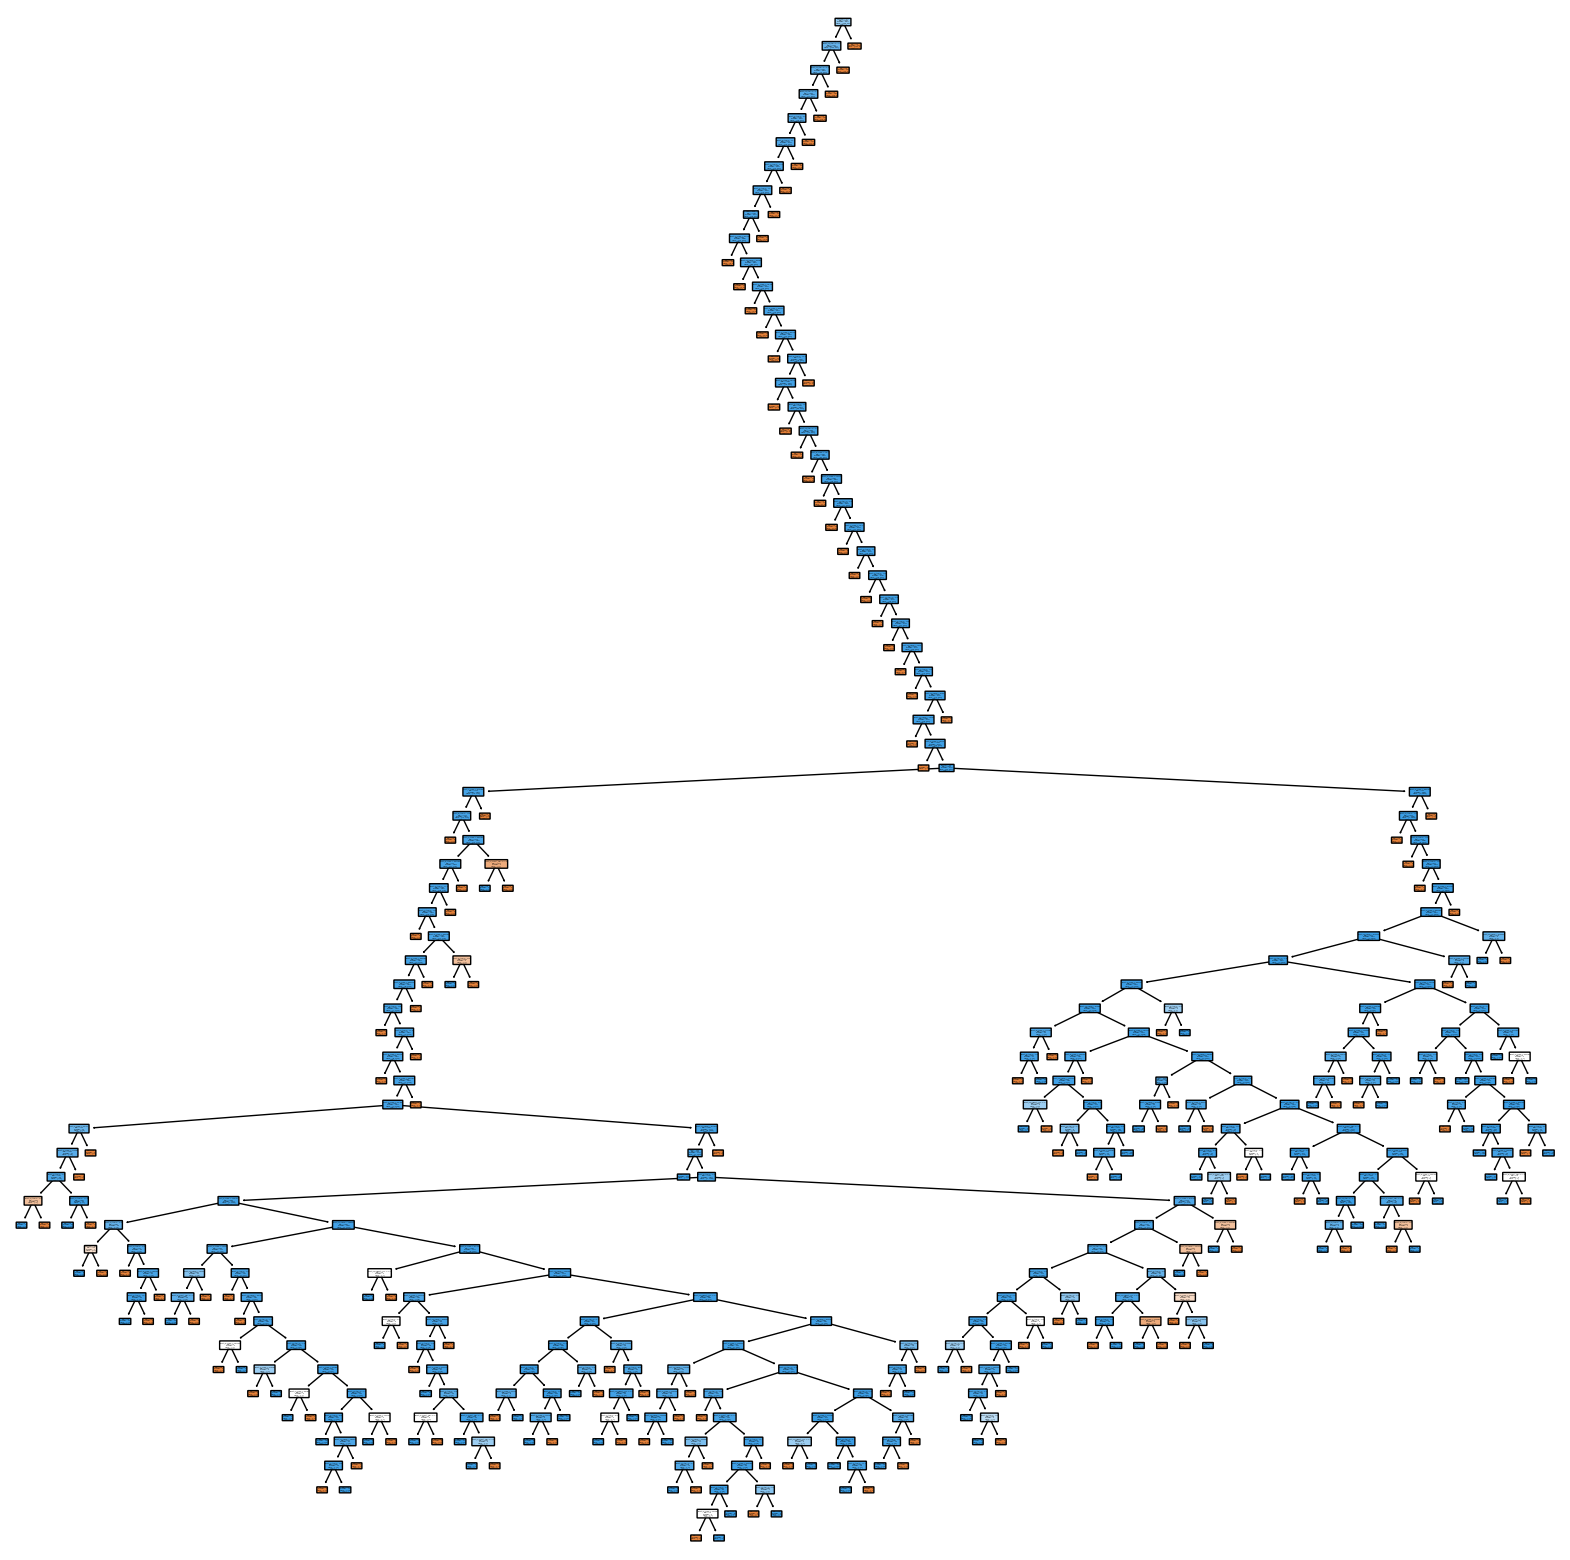

In [730]:
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, rounded=True, class_names=['0','1','2','3','4'], feature_names=df.columns);

In [731]:
pred_dt = predicted


In [732]:
print("optimal threshold F1: ", f1_score(y_test, pred_dt))
print("optimal threshold precision: ", precision_score(y_test, pred_dt))
print("optimal threshold recall: ", recall_score(y_test, pred_dt))
print("optimal threshold accuracy: ", accuracy_score(y_test, pred_dt))

optimal threshold F1:  0.9709281961471105
optimal threshold precision:  0.9712683952347583
optimal threshold recall:  0.9705882352941176
optimal threshold accuracy:  0.9585


The test score shows this model is not bad!

# 7. Explaining your results

Explain your model to a business executive. Your explanation should include the following:
Your data exploration findings, initial hypothesis, and whether the hypothesis proved true.
Your approach for building and evaluating the model. 
The final model you selected and how you know this is the best model for the problem.
How the model should be used by the business, in business process.

Your data exploration findings, initial hypothesis, and whether the hypothesis proved true.

Based on our EDA part,my initial hypothesis is "People from US and Canada more perfer to churn. Also, People who use the Android are more per to Churn and people with lower age will not churn!" This hypotheis is true.

Your approach for building and evaluating the model. 

I set train data as 80% and test data with 20%, then I use f1, precision, recall, and accuracy methods test the model performence. This showed the model is pretty good. 

The final model you selected and how you know this is the best model for the problem.

I am using Cross Validation to test different models and I find Discision Tree has the best performence over others. 

How the model should be used by the business, in business process.

The business could use this model mainly focus on the US and Canada market. 
Also, focus on young people and people who use the Andriod phone. 